# Proyek Pertama Machine Learning Terapan: Bike Sharing Dataset
- **Nama:** Taufan Fajarama Putrawansyah R
- **Email:** tfpruslanali@gmail.com
- **ID Dicoding:** roastland

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

## Data Loading

In [2]:
# bike sharing day dataset
url_day = 'https://raw.githubusercontent.com/roastland/machine-learning-terapan/main/projects/half-class-project/Bike-sharing-dataset/day.csv'
bike_day = pd.read_csv(url_day)
bike_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

Berikut informasi umum pada dataset `day.csv`:
- Ada 731 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 16 kolom yaitu: instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.

In [3]:
# bike sharing hour dataset
url_hour = 'https://raw.githubusercontent.com/roastland/machine-learning-terapan/main/projects/half-class-project/Bike-sharing-dataset/hour.csv'
bike_hour = pd.read_csv(url_hour)
bike_hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

Berikut informasi umum pada dataset `hour.csv`:
- Ada 17.379 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 17 kolom yaitu: instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.

## Exploratory Data Analysis

### Deskripsi dan Transformasi Variabel

Informasi Atribut:

`hour.csv` dan `day.csv` sama-sama memiliki kolom berikut, kecuali `hr` tidak ada di `day.csv`

- instant: index data
- dteday : tanggal
- season : musim (1: winter, 2: spring, 3: summer, 4: fall)
- yr : tahun (0: 2011, 1: 2012)
- mnth : bulan (1 sampai 12)
- hr : jam (0 sampai 23)
- holiday : 1 jika hari libur atau 0 jika tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
- weekday : hari dalam 1 minggu (0 sampai 6: minggu-sabtu)
- workingday : 1 jika bukan weekend (sabtu/minggu) atau bukan holiday, 0 jika selain itu.
- weathersit : cuaca (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow)
- temp : temperatur dalam Celsius yang sudah dinormalisasi. Nilainya didapat dari (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala perjam)
- atemp: temperatur yang dirasakan dalam Celsius yang sudah dinormalisasi. Nilainya didapat dari (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala perjam)
- hum: kelembaban yang sudah dinormalisasi. Nilainya dibagi dengan 100 (max)
- windspeed: kecepatan angin yang sudah dinormalisasi. Nilainya dibagi dengan 67 (max)
- casual: jumlah pengguna biasa
- registered: jumlah pengguna yang terdaftar
- cnt: jumlah total casual dan registered

Informasi lebih lanjut dapat dilihat di tautan berikut
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [4]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada `day.csv` terlihat bahwa:

- Terdapat 1 kolom dengan tipe object, yaitu: `dteday`. Kolom ini menandakan time-series data.
- Terdapat 11 kolom dengan tipe data int64. Terdiri dari 1 kolom indeks (`instant`), 5 kolom categorical features yang sudah di-encoding dalam numerik (`season, yr, mnth, weekday, weathersit`) dan binary (`holiday, workingday`), dan 3 kolom target (`casual, registered, cnt`).
- Terdapat 4 kolom dengan tipe data float64. Terdiri dari 4 kolom numerical features (`temp, atemp, hum, windspeed`).

In [5]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada `hour.csv` terlihat bahwa:

- Terdapat 1 kolom dengan tipe object, yaitu: `dteday`. Kolom ini menandakan time-series data.
- Terdapat 12 kolom dengan tipe data int64. Terdiri dari 1 kolom indeks (`instant`), 6 kolom categorical features yang sudah di-encoding dalam numerik (`season, yr, mnth, hr, weekday, weathersit`) dan binary (`holiday, workingday`), dan 3 kolom target (`casual, registered, cnt`).
- Terdapat 4 kolom dengan tipe data float64. Terdiri dari 4 kolom numerical features (`temp, atemp, hum, windspeed`).

In [6]:
bike_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
bike_hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000



---


Berdasarkan informasi atribut dan informasi dataset `day.csv` dan `hour.csv`, diputuskan untuk melakukan beberapa transformasi:
- menghapus kolom `instant` karena hanya menunjukkan indeks
- merubah datatype kolom `dteday` menjadi datetime dan menjadikannya indeks dataframe
- merubah categorical features `season`, `weekday`, dan `weathersit` dari bentuk numerikal menjadi ordinal agar lebih deskriptif dan nantinya dapat dilakukan one hot encoding
- menghapus kolom `cnt` sehingga kolom target hanya `casual` dan `registered` karena kolom `cnt` hanya menjumlahkan kedua kolom tersebut

#### `Day` Dataset

In [8]:
# copy dataset
df_day = bike_day.copy()

# menghapus kolom `instant` dan `cnt`
df_day.drop(columns=['instant','cnt'], inplace=True)

# merubah datatype `dteday` dan menjadikannya index
df_day['dteday'] = pd.to_datetime(bike_day['dteday'])
df_day.set_index('dteday', inplace=True)

# merubah `season`, `weekday`, dan `weathersit` dari numerik menjadi ordinal
df_day['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}, inplace=True)
df_day['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
df_day['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}, inplace=True)

In [9]:
df_day.sample()

season  yr  mnth  holiday weekday  workingday weathersit  \
dteday                                                                 
2011-04-04  Spring   0     4        0  Monday           1      Clear   

                temp     atemp      hum  windspeed  casual  registered  
dteday                                                                  
2011-04-04  0.573333  0.542929  0.42625   0.385571     734        2381

In [10]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 80.0+ KB


Kondisi `day.csv` setelah ditransformasi:

- Indeks data merupakan time-series
- Terdapat 3 kolom dengan tipe object, yaitu: `season`, `weekday`, dan `weathersit`. Kolom ini menandakan categorical features dan akan dilakukan one hot encoding nantinya.
- Terdapat 6 kolom dengan tipe data int64. Terdiri dari 4 kolom categorical features yang sudah di-encoding dalam numerik (`yr, mnth`) dan binary (`holiday, workingday`), dan 2 kolom target (`casual, registered`).
- Terdapat 4 kolom dengan tipe data float64. Terdiri dari 4 kolom numerical features (`temp, atemp, hum, windspeed`).

#### `Hour` Dataset

In [11]:
#copy dataset
df_hour = bike_hour.copy()

# menghapus kolom `instant` dan `cnt`
df_hour.drop(columns=['instant','cnt'], inplace=True)

# merubah datatype `dteday` dan menjadikannya index
df_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])
df_hour.set_index('dteday', inplace=True)

# merubah `season`, `weekday`, dan `weathersit` dari numerik menjadi ordinal
df_hour['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}, inplace=True)
df_hour['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
df_hour['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}, inplace=True)

In [12]:
df_hour.sample()

season  yr  mnth  hr  holiday   weekday  workingday  \
dteday                                                            
2011-04-16  Spring   0     4   8        0  Saturday           0   

                 weathersit  temp   atemp   hum  windspeed  casual  registered  
dteday                                                                          
2011-04-16  Light Rain/Snow   0.4  0.4091  0.87     0.3582       7          38

In [13]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 2.0+ MB


Kondisi `hour.csv` setelah ditransformasi:

- Indeks data merupakan time-series
- Terdapat 3 kolom dengan tipe object, yaitu: `season`, `weekday`, dan `weathersit`. Kolom ini menandakan categorical features dan akan dilakukan one hot encoding nantinya.
- Terdapat 7 kolom dengan tipe data int64. Terdiri dari 5 kolom categorical features yang sudah di-encoding dalam numerik (`yr, mnth, hr`) dan binary (`holiday, workingday`), dan 2 kolom target (`casual, registered`).
- Terdapat 4 kolom dengan tipe data float64. Terdiri dari 4 kolom numerical features (`temp, atemp, hum, windspeed`).

In [14]:
target_columns = ['casual', 'registered']

numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

day_categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
hour_categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

### Menangani Missing Value dan Outliers

In [15]:
df_day.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

In [16]:
df_hour.isna().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

Tidak terdapat missing value pada dataset `day` dan dataset `hour`

In [17]:
df_day.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
dtype: int64

In [18]:
df_hour.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
dtype: int64

Pada categorical features, kolom `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, dan `workingday` memiliki nilai unik yang konsisten untuk kedua dataset. Sedangkan kolom `weathersit` terdapat perbedaan di mana dataset `day` hanya memiliki 3 nilai dan dataset `hour` memiliki 4 nilai.

In [19]:
# fungsi untuk menampilkan outlier menggunakan boxplot
def plot_multiple_boxplots(df, cols):
    num_cols = len(cols)

    ncols = 2
    nrows = (num_cols + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
    axes = axes.flatten()

    for i, column in enumerate(cols):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot of `{column}`')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

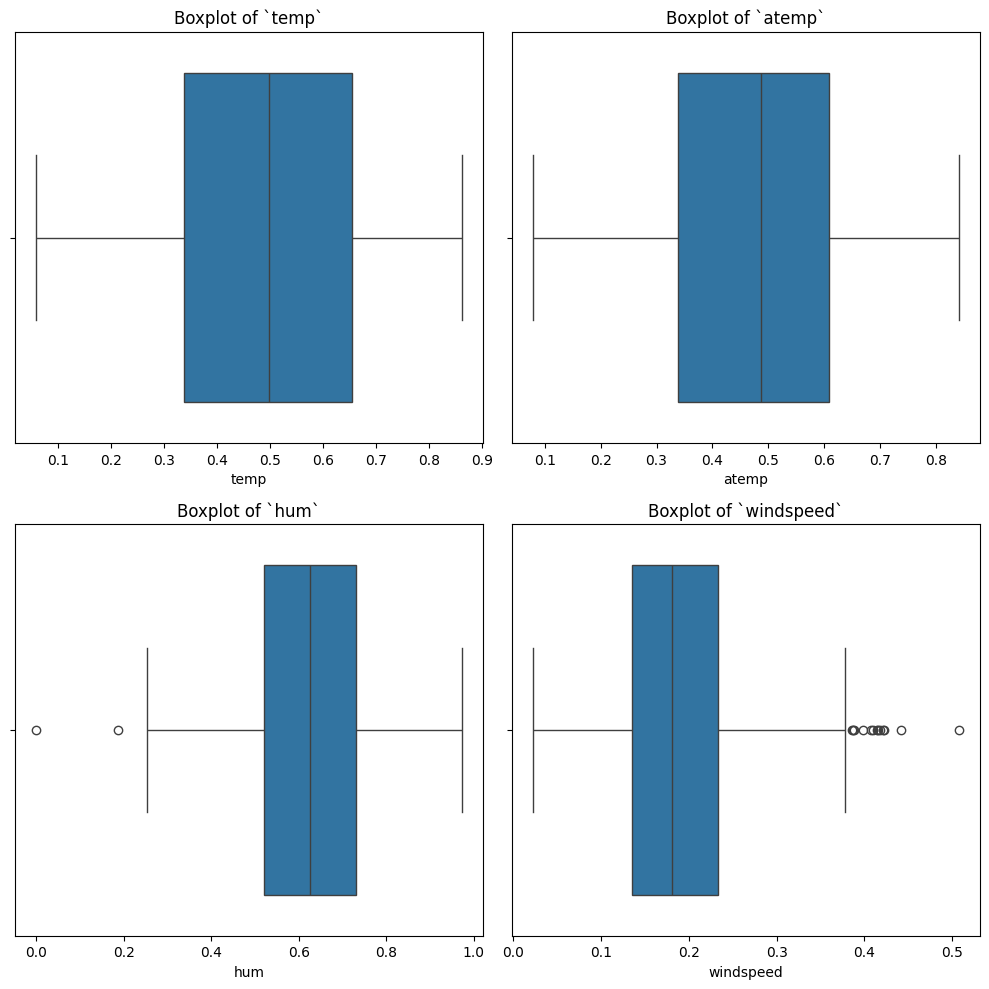

In [20]:
plot_multiple_boxplots(df_day, numerical_features)

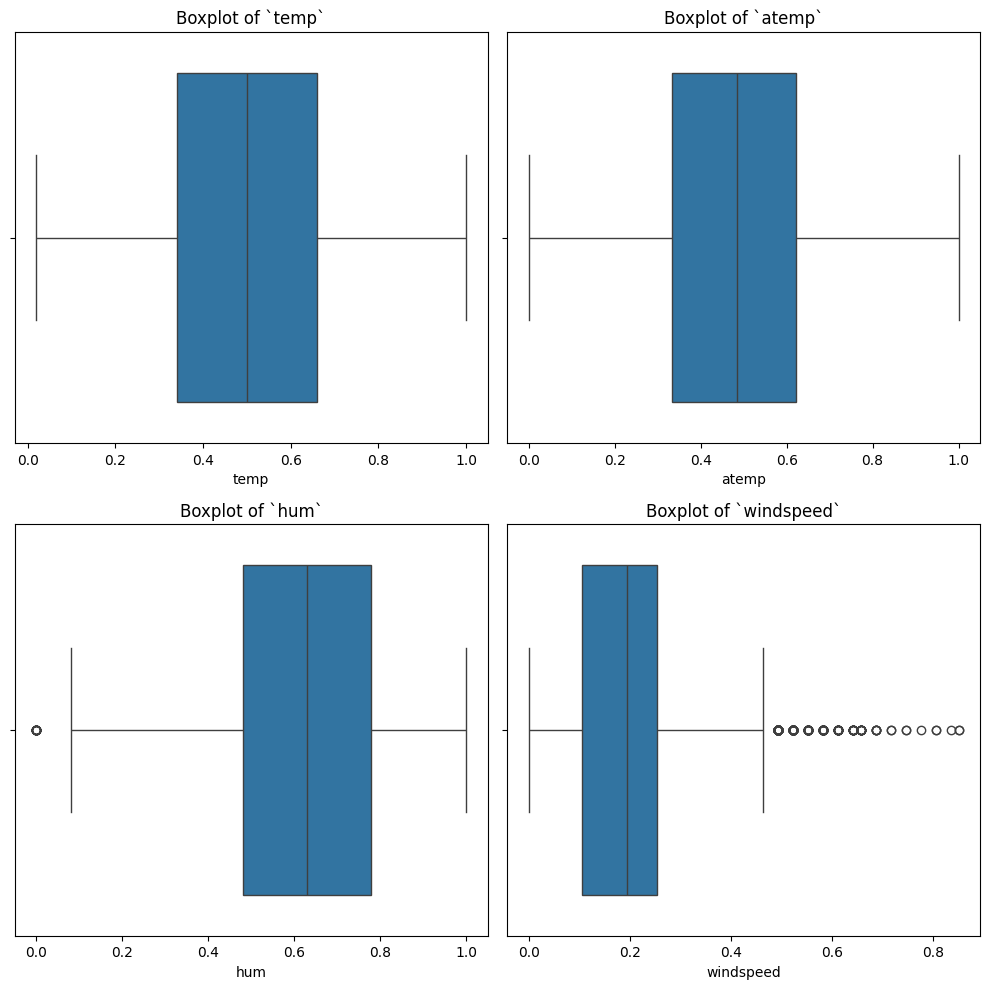

In [21]:
plot_multiple_boxplots(df_hour, numerical_features)

Pada numerical features, kolom `temp` dan `atemp` tidak terdapat outlier di kedua dataset. Sedangkan kolom `hum` dan `windspeed` terdapat outlier di kedua dataset.

In [22]:
# fungsi untuk imputasi nilai outlier
def impute_outliers_with_iqr(df, cols):
    new_df = df.copy()

    for column in cols.columns:
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        new_df.loc[new_df[column] < lower_bound, column] = Q1
        new_df.loc[new_df[column] > upper_bound, column] = Q3

    return new_df

Kedua dataset merupakan time-series dataset sehingga apabila ada baris yang dihapus akan menghilangkan kontinuitas dari data.

Maka dari itu, outlier di kedua dataset akan dilakukan imputasi nilai menggunakan nilai `lower_bound` atau `upper_bound` sehingga kontinuitas data tetap terjaga dan outlier dapat ditangani.

#### `Day` Dataset

In [23]:
# copy dataset
df_day_imputed = df_day.copy()

# pilih kolom `hum` dan `windspeed`
outlier_cols_day = df_day_imputed[['hum', 'windspeed']]

df_day_imputed = impute_outliers_with_iqr(df_day_imputed, outlier_cols_day)
df_day_imputed.sample()

season  yr  mnth  holiday weekday  workingday weathersit    temp  \
dteday                                                                         
2011-05-13  Spring   0     5        0  Friday           1       Mist  0.5125   

             atemp       hum  windspeed  casual  registered  
dteday                                                       
2011-05-13  0.4943  0.863333   0.179725     692        3413

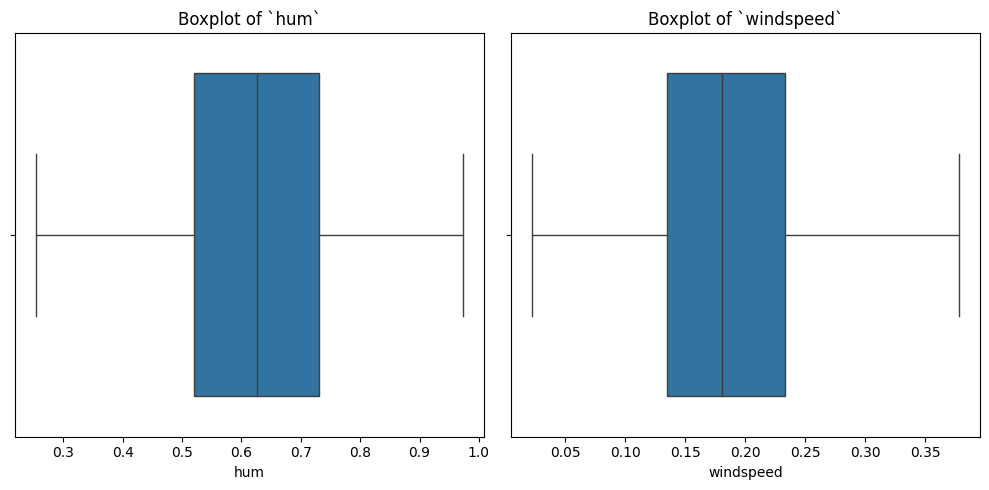

In [24]:
plot_multiple_boxplots(df_day_imputed, ['hum', 'windspeed'])

#### `Hour` Dataset

In [25]:
# copy dataset
df_hour_imputed = df_hour.copy()

# pilih kolom `hum` dan `windspeed`
outlier_cols_hour = df_hour_imputed[['hum', 'windspeed']]

df_hour_imputed = impute_outliers_with_iqr(df_hour_imputed, outlier_cols_hour)
df_hour_imputed.sample()

season  yr  mnth  hr  holiday  weekday  workingday weathersit  \
dteday                                                                     
2011-10-25   Fall   0    10  17        0  Tuesday           1      Clear   

            temp   atemp   hum  windspeed  casual  registered  
dteday                                                         
2011-10-25  0.56  0.5303  0.37     0.1045      68         517

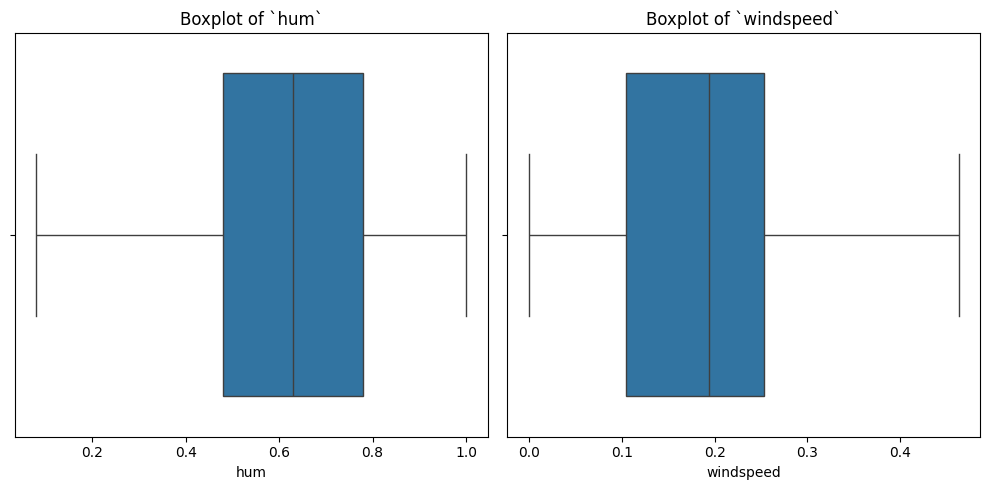

In [26]:
plot_multiple_boxplots(df_hour_imputed, ['hum', 'windspeed'])

### Univariate Analysis

In [27]:
# fungsi untuk menampilkan barchart dari setiap categorical features
def categorical_feat(df, feature):
    count = df[feature].value_counts()
    percent = 100*df[feature].value_counts(normalize=True)
    info_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(info_df)

    plt.figure(figsize=(8, 4))
    count.plot(kind='bar', title=feature, color=sns.color_palette("Set2", n_colors=len(count)))
    plt.show()

#### `Day` Dataset

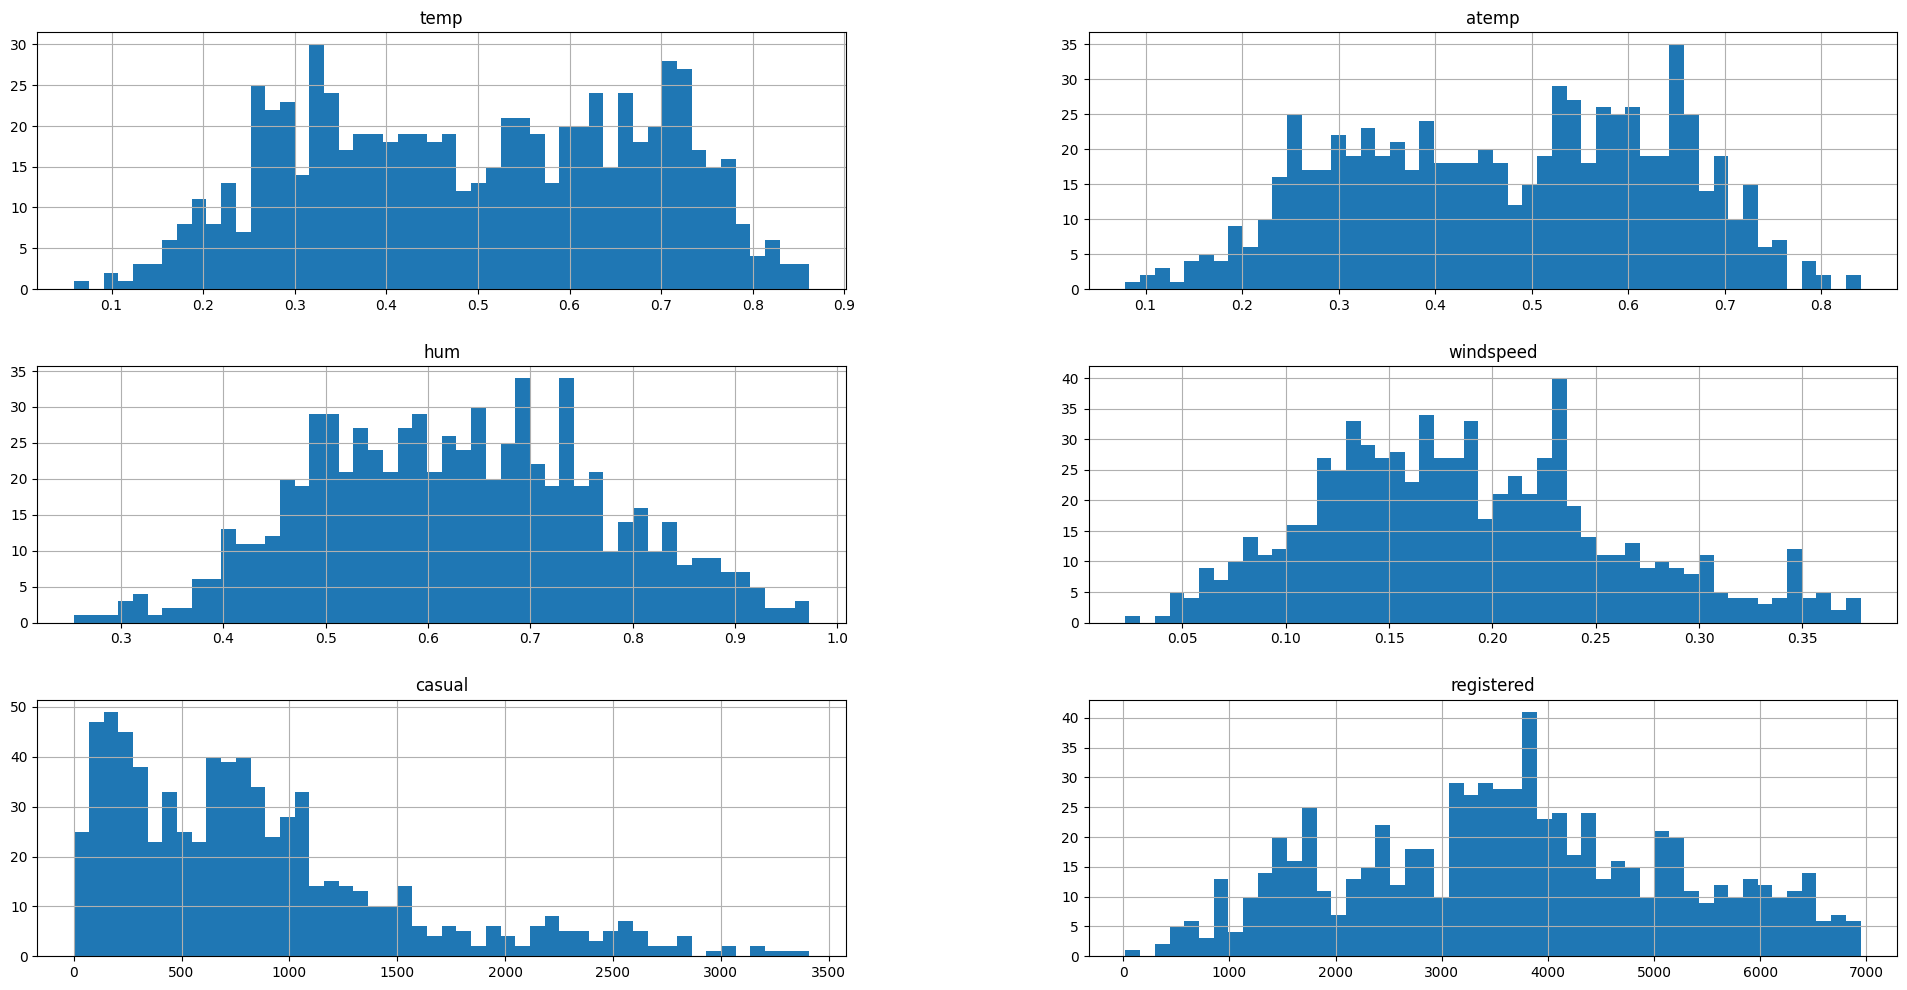

In [28]:
df_day_imputed[numerical_features + target_columns].hist(bins=50, figsize=(24,12))
plt.show()

Dari histogram `casual`, beberapa informasi di antaranya:

- Sebagian data terdapat jumlah pengguna harian di bawah 1000.
- Distribusi data miring ke kanan (right-skewed).

Dari histogram `registered`, beberapa informasi di antaranya:

- Distribusi data normal (normal distribution).

        jumlah sampel  persentase
season                           
Summer            188        25.7
Spring            184        25.2
Winter            181        24.8
Fall              178        24.4


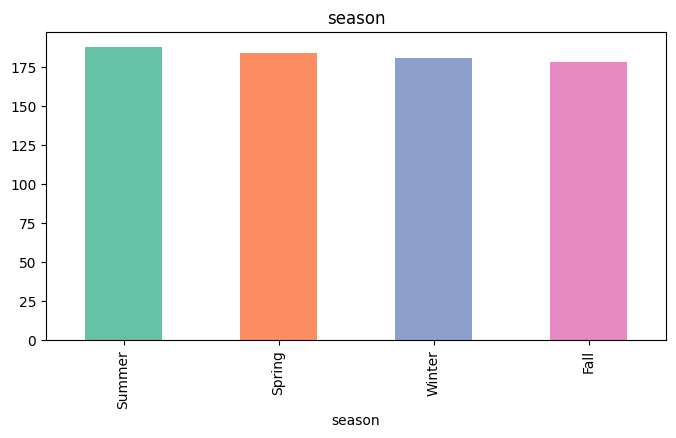

    jumlah sampel  persentase
yr                           
1             366        50.1
0             365        49.9


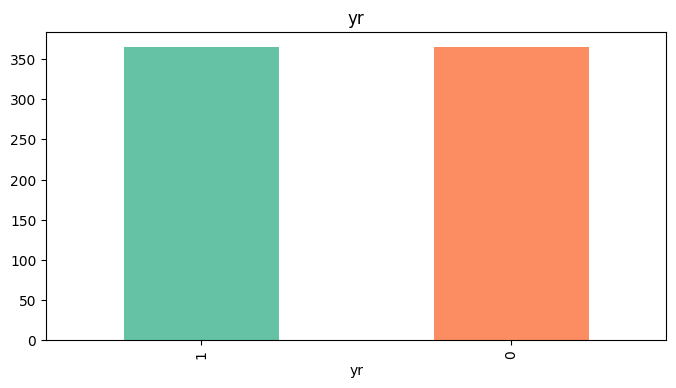

      jumlah sampel  persentase
mnth                           
1                62         8.5
3                62         8.5
5                62         8.5
7                62         8.5
8                62         8.5
10               62         8.5
12               62         8.5
4                60         8.2
6                60         8.2
9                60         8.2
11               60         8.2
2                57         7.8


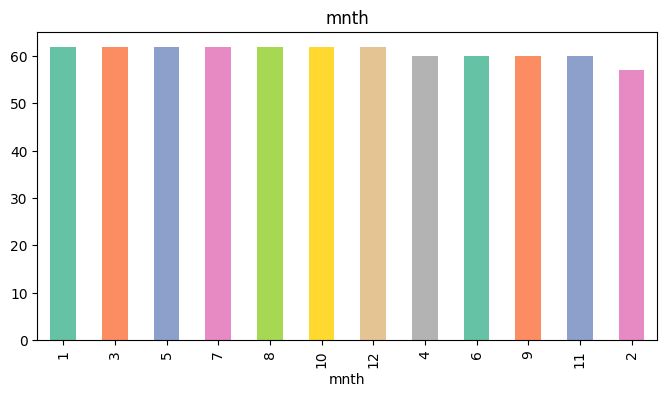

         jumlah sampel  persentase
holiday                           
0                  710        97.1
1                   21         2.9


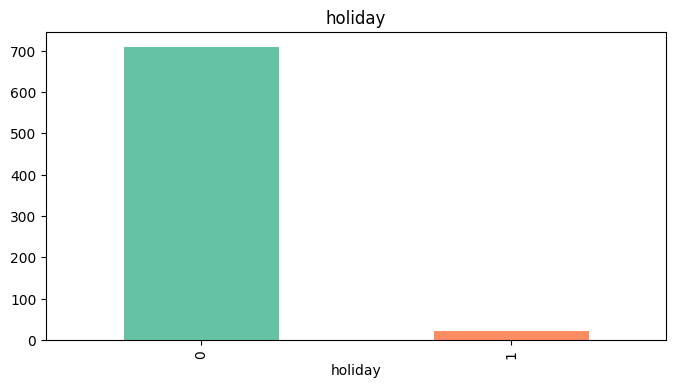

           jumlah sampel  persentase
weekday                             
Saturday             105        14.4
Sunday               105        14.4
Monday               105        14.4
Tuesday              104        14.2
Wednesday            104        14.2
Thursday             104        14.2
Friday               104        14.2


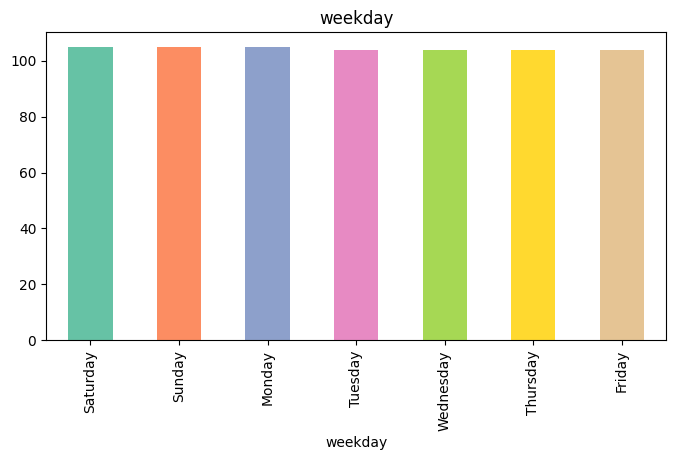

            jumlah sampel  persentase
workingday                           
1                     500        68.4
0                     231        31.6


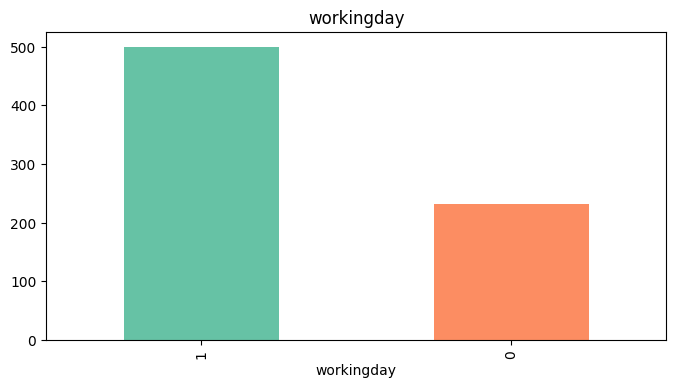

                 jumlah sampel  persentase
weathersit                                
Clear                      463        63.3
Mist                       247        33.8
Light Rain/Snow             21         2.9


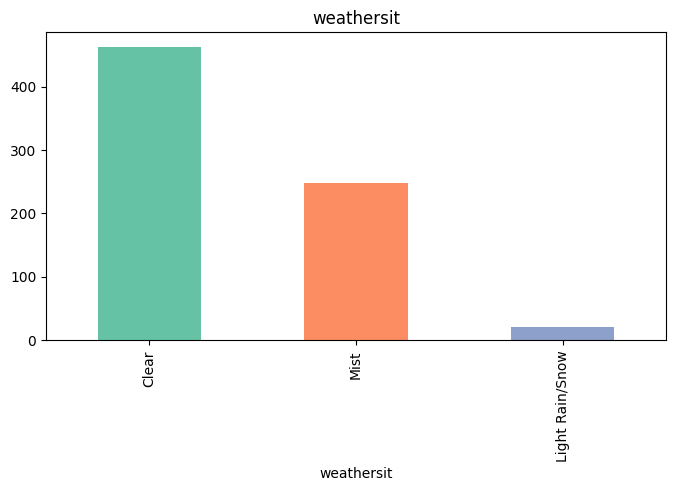

In [29]:
for col in day_categorical_features:
  categorical_feat(df_day_imputed, col)

Kolom `season`, `yr`, `mnth`, `weekday` terdistribusi merata di setiap nilai karena menandakan indikator hari. Kolom `holiday` dan `workingday` juga bernilai sesuai dengan keadaan indikator hari (lebih banyak workingday dan sedikit holiday). Kolom `weathersit` didominasi kondisi `Clear`, diikuti `Mist`, dan paling sedikit `Light Rain/Snow`.

#### `Hour` Dataset

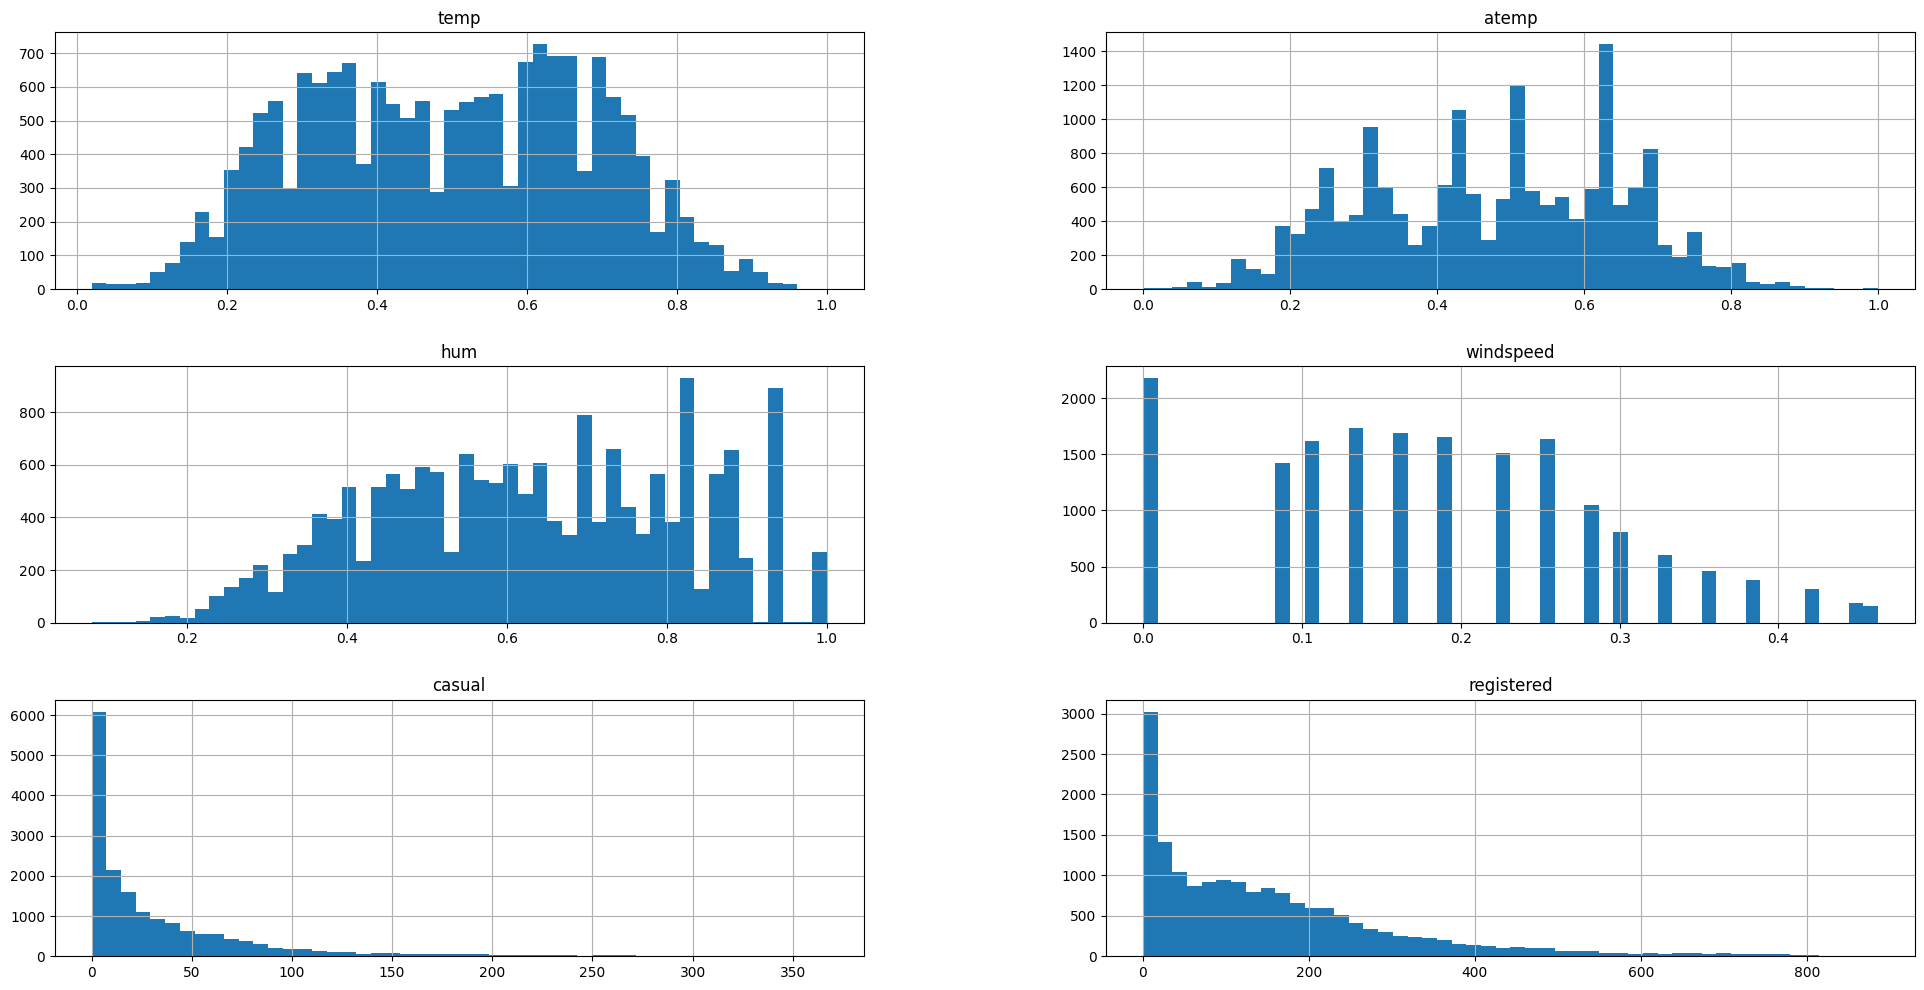

In [30]:
df_hour_imputed[numerical_features + target_columns].hist(bins=50, figsize=(24,12))
plt.show()

Dari histogram `casual`, beberapa informasi di antaranya:

- Sebagian data terdapat jumlah pengguna perjam di bawah 50.
- Distribusi data miring ke kanan (right-skewed).

Dari histogram `registered`, beberapa informasi di antaranya:

- Sebagian data terdapat jumlah pengguna perjam di bawah 200.
- Distribusi data miring ke kanan (right-skewed).

        jumlah sampel  persentase
season                           
Summer           4496        25.9
Spring           4409        25.4
Winter           4242        24.4
Fall             4232        24.4


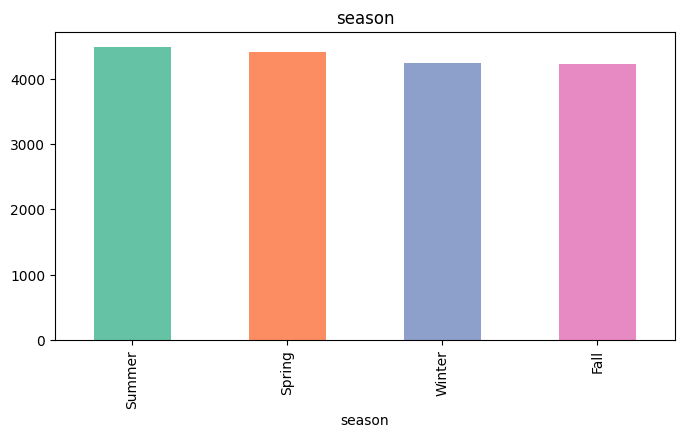

    jumlah sampel  persentase
yr                           
1            8734        50.3
0            8645        49.7


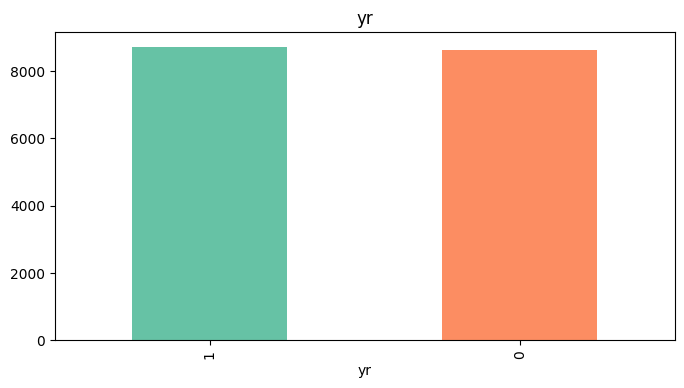

      jumlah sampel  persentase
mnth                           
5              1488         8.6
7              1488         8.6
12             1483         8.5
8              1475         8.5
3              1473         8.5
10             1451         8.3
6              1440         8.3
4              1437         8.3
9              1437         8.3
11             1437         8.3
1              1429         8.2
2              1341         7.7


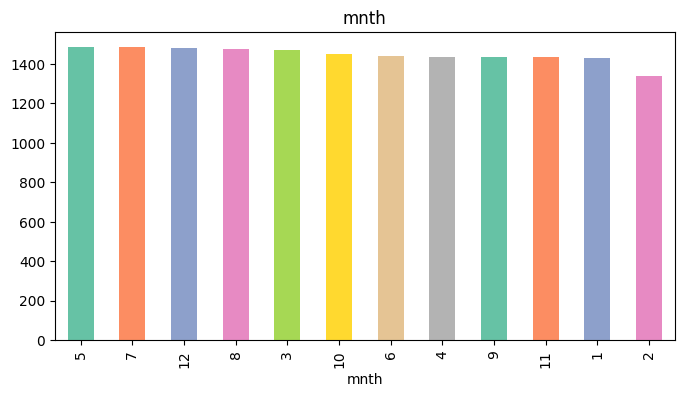

    jumlah sampel  persentase
hr                           
17            730         4.2
16            730         4.2
13            729         4.2
15            729         4.2
14            729         4.2
12            728         4.2
22            728         4.2
21            728         4.2
20            728         4.2
19            728         4.2
18            728         4.2
23            728         4.2
11            727         4.2
10            727         4.2
9             727         4.2
8             727         4.2
7             727         4.2
0             726         4.2
6             725         4.2
1             724         4.2
5             717         4.1
2             715         4.1
4             697         4.0
3             697         4.0


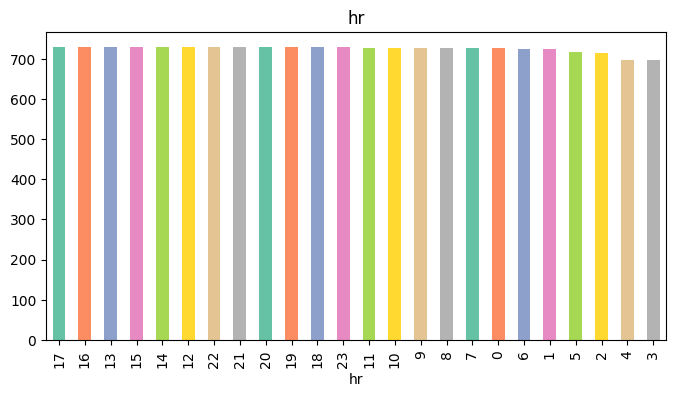

         jumlah sampel  persentase
holiday                           
0                16879        97.1
1                  500         2.9


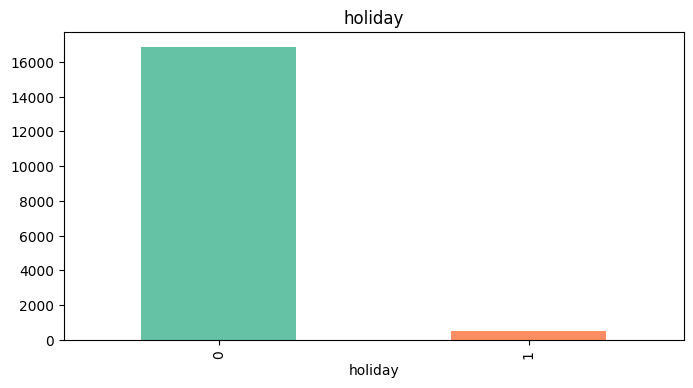

           jumlah sampel  persentase
weekday                             
Saturday            2512        14.5
Sunday              2502        14.4
Friday              2487        14.3
Monday              2479        14.3
Wednesday           2475        14.2
Thursday            2471        14.2
Tuesday             2453        14.1


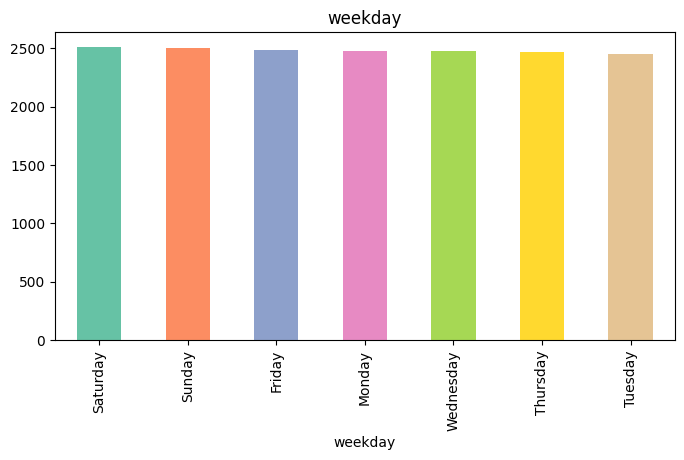

            jumlah sampel  persentase
workingday                           
1                   11865        68.3
0                    5514        31.7


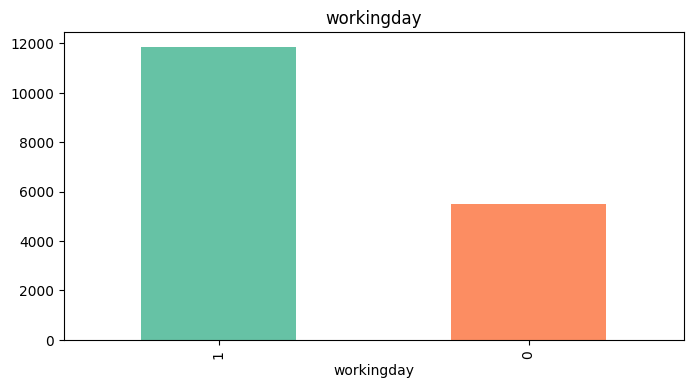

                 jumlah sampel  persentase
weathersit                                
Clear                    11413        65.7
Mist                      4544        26.1
Light Rain/Snow           1419         8.2
Heavy Rain/Snow              3         0.0


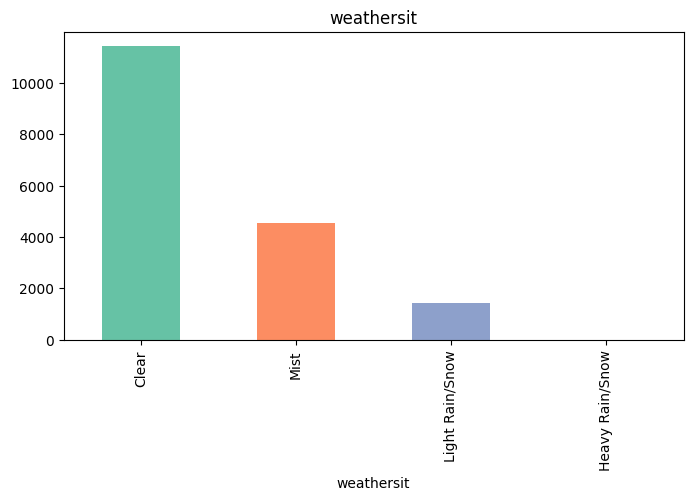

In [31]:
for col in hour_categorical_features:
  categorical_feat(df_hour_imputed, col)

Kolom `season`, `yr`, `mnth`, `hr`, `weekday` terdistribusi merata di setiap nilai karena menandakan indikator hari. Kolom `holiday` dan `workingday` juga bernilai sesuai dengan keadaan indikator hari (lebih banyak workingday dan sedikit holiday). Kolom `weathersit` didominasi kondisi `Clear`, diikuti `Mist`, `Light Rain/Snow`, dan paling sedikit `Heavy Rain/Snow`.

### Multivariate Analysis

#### Time Series

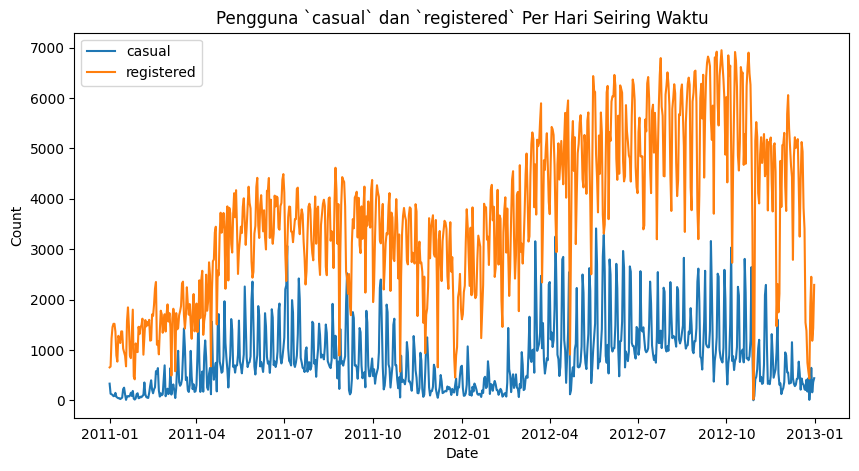

In [32]:
plt.figure(figsize=(10, 5))

for column in target_columns:
    plt.plot(df_day_imputed.index, df_day_imputed[column], label=column)

plt.title('Pengguna `casual` dan `registered` Per Hari Seiring Waktu')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.show()

Pengguna `casual` dan `registered` menunjukkan kenaikan jumlah di tahun 2012 dibanding 2011.

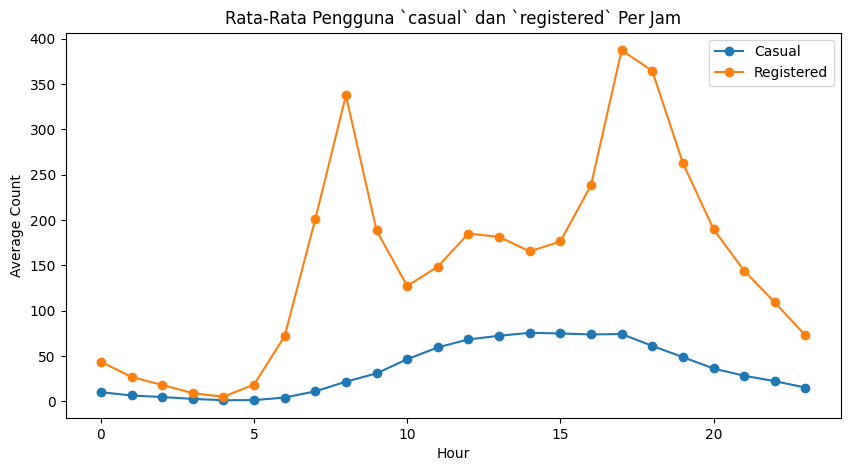

In [33]:
# Group setiap jam 'hr' dan hitung rata-rata `casual` dan `registered`
hour = df_hour_imputed.groupby('hr')[target_columns].mean()

plt.figure(figsize=(10, 5))
plt.plot(hour.index, hour['casual'], label='Casual', marker='o')
plt.plot(hour.index, hour['registered'], label='Registered', marker='o')

plt.title('Rata-Rata Pengguna `casual` dan `registered` Per Jam')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.legend()

plt.show()

Pengguna `casual` cenderung lebih banyak di sekitar jam 12-16, sedangkan pengguna `registered` puncaknya di jam 8 dan jam 17-18. Dapat diasumsikan bahwa pengguna `registered` adalah para pekerja yang berangkat kerja (jam 8) dan pulang kerja (jam 17).

#### Categorical Features

##### `Day` Dataset

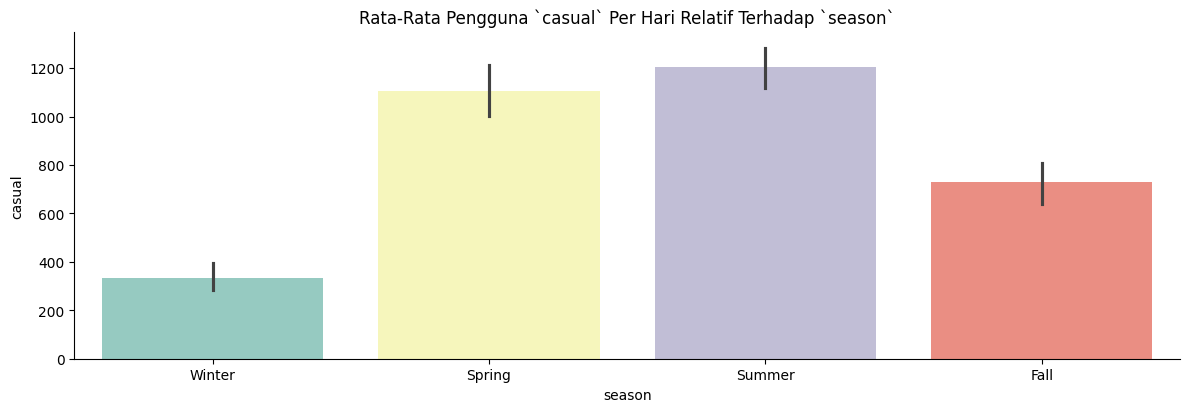

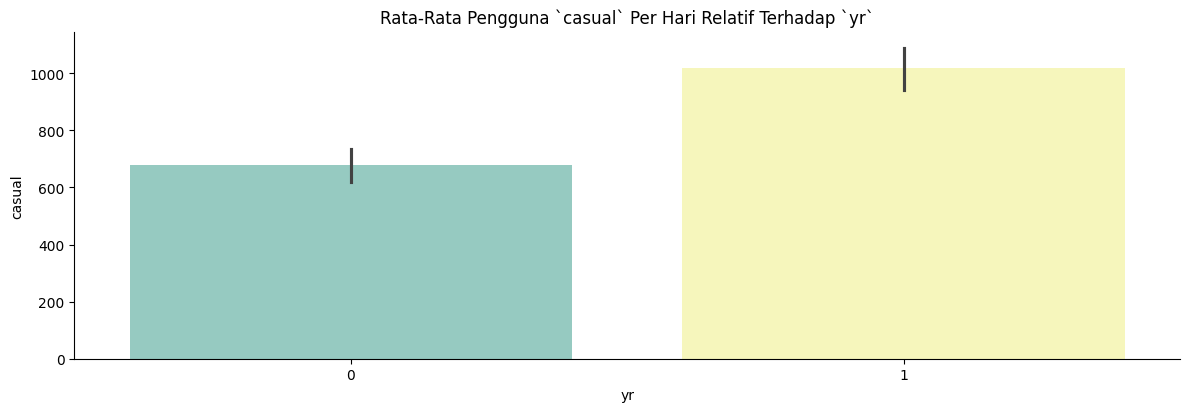

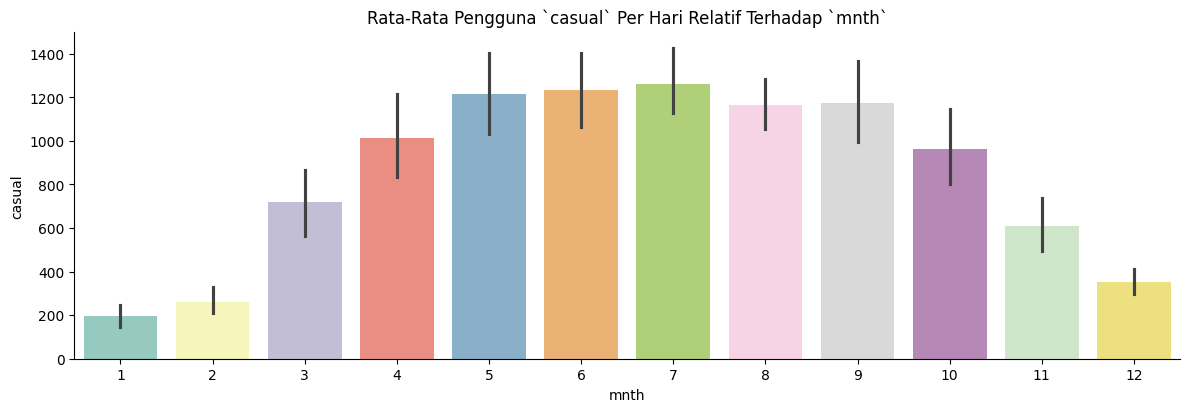

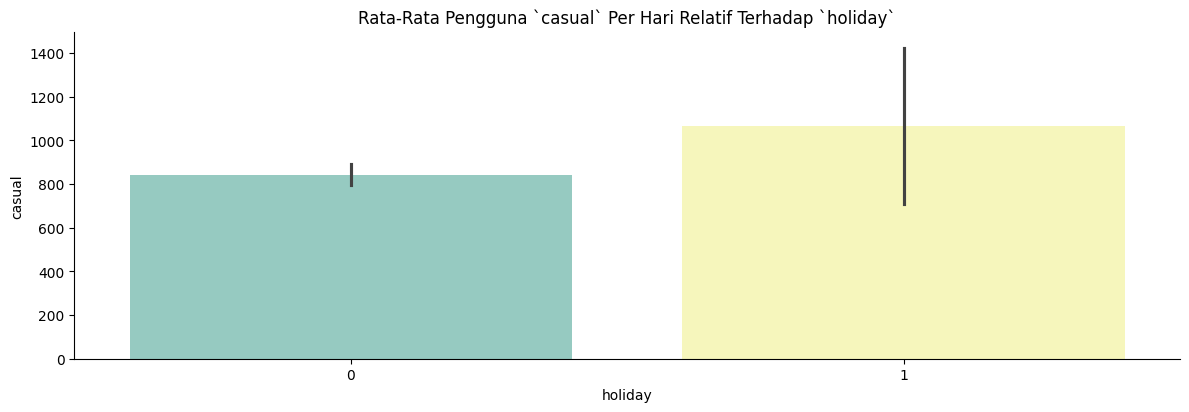

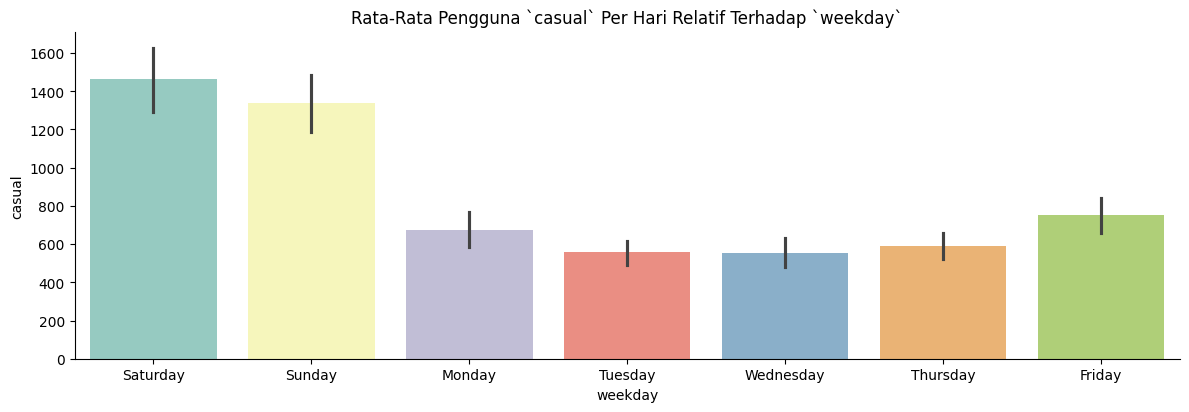

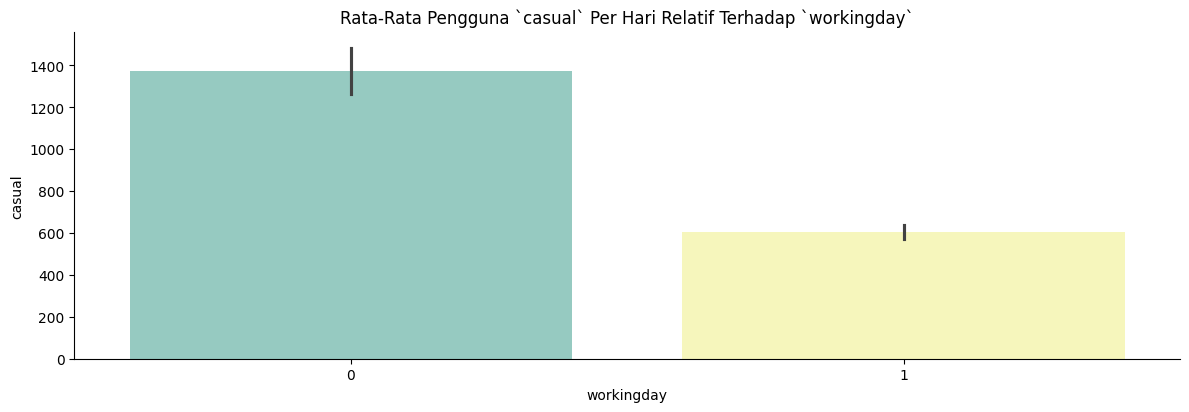

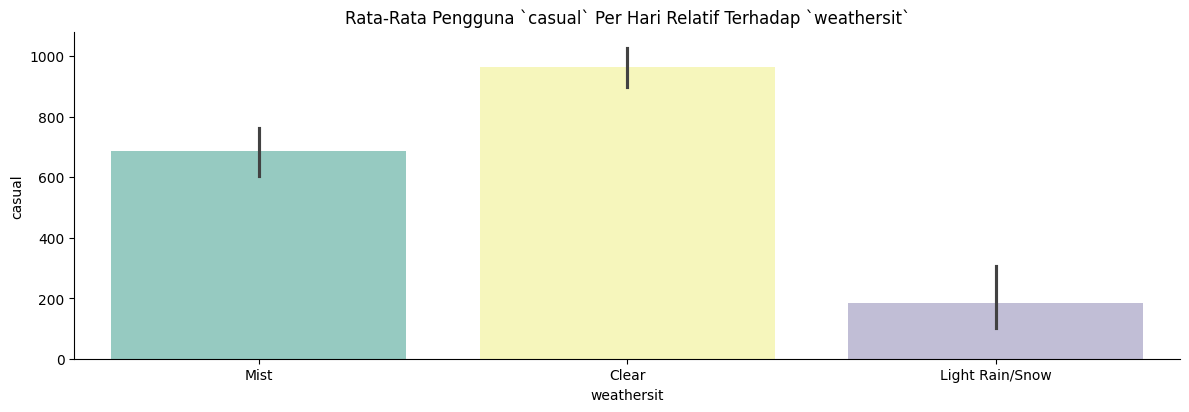

In [34]:
for col in day_categorical_features:
  sns.catplot(x=col, y="casual", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_day_imputed, palette="Set3", hue=col, legend=False)
  plt.title("Rata-Rata Pengguna `casual` Per Hari Relatif Terhadap `{}`".format(col))

Pada setiap fitur kategorikal, pengguna `casual` per hari cenderung lebih banyak di musim spring/summer, tahun 2012, bulan april-september, hari libur, hari sabtu/minggu, bukan hari kerja, dan pada cuaca cerah. Dapat diasumsikan bahwa pengguna `casual` adalah para pengguna yang sedang berlibur.

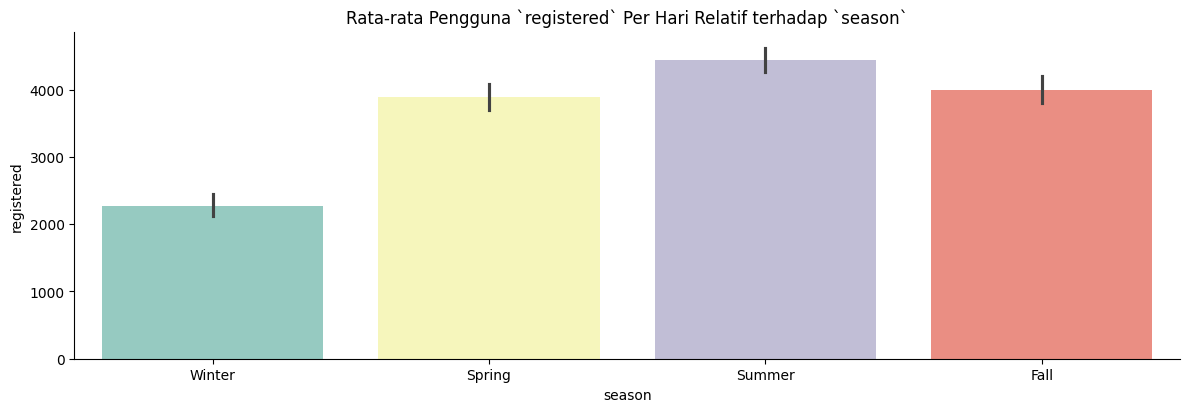

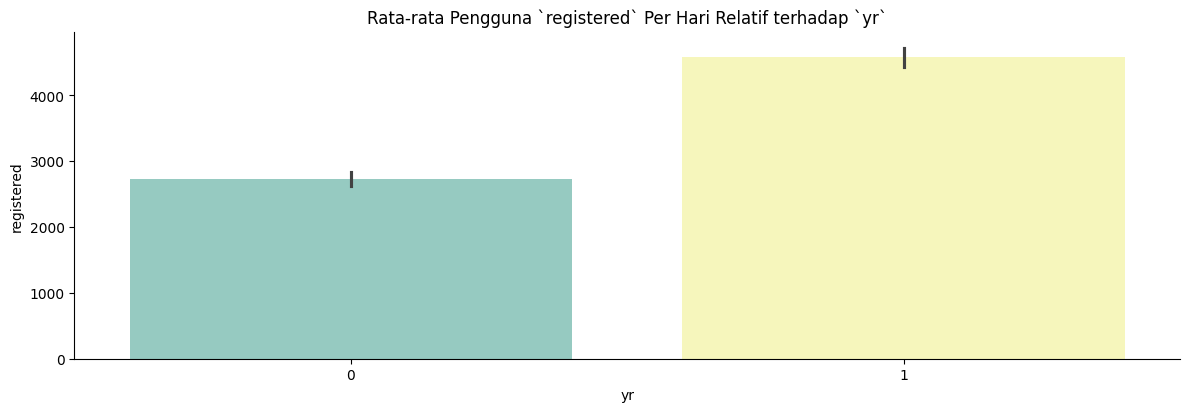

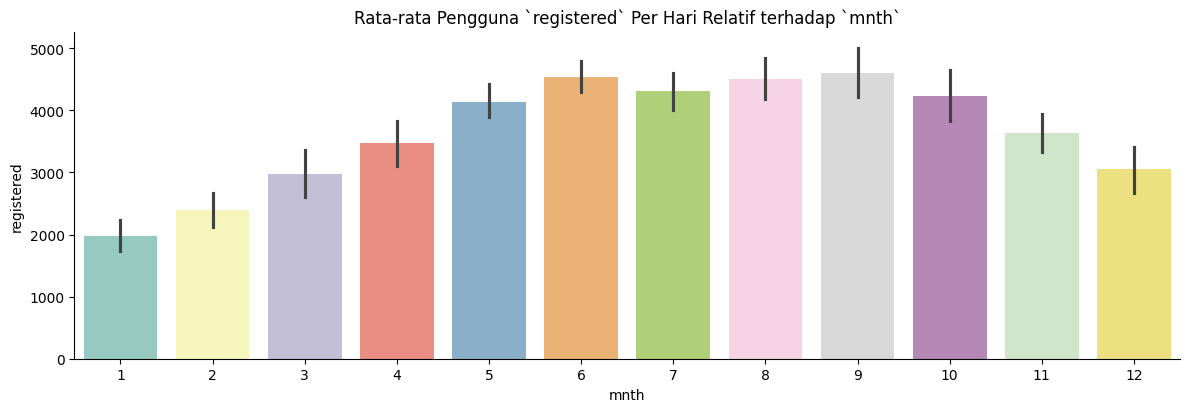

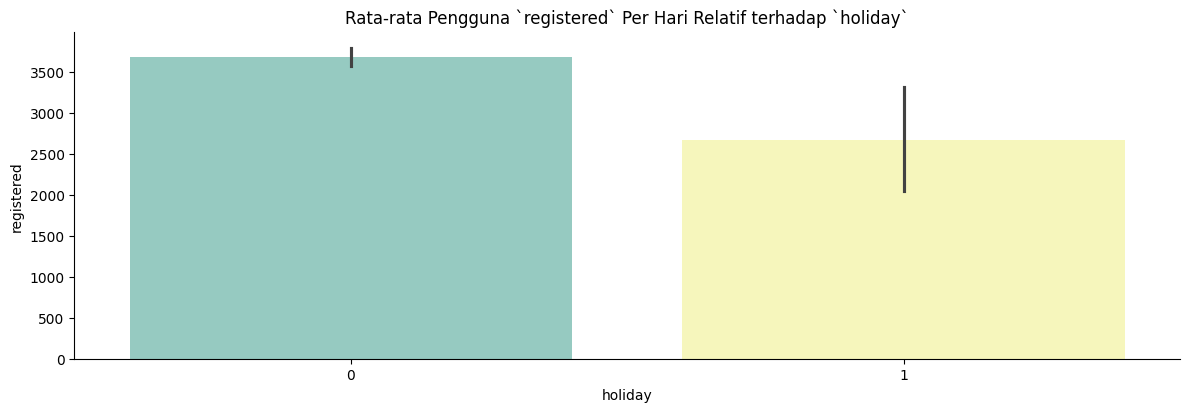

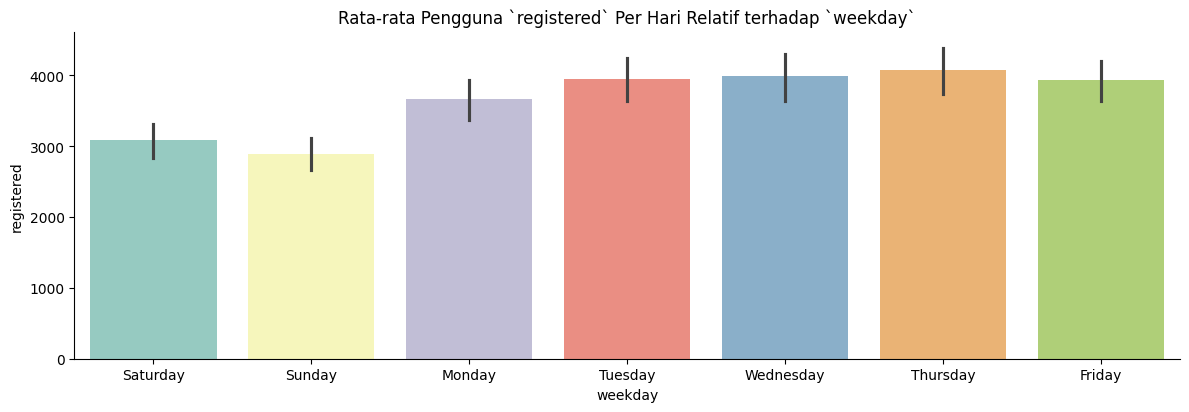

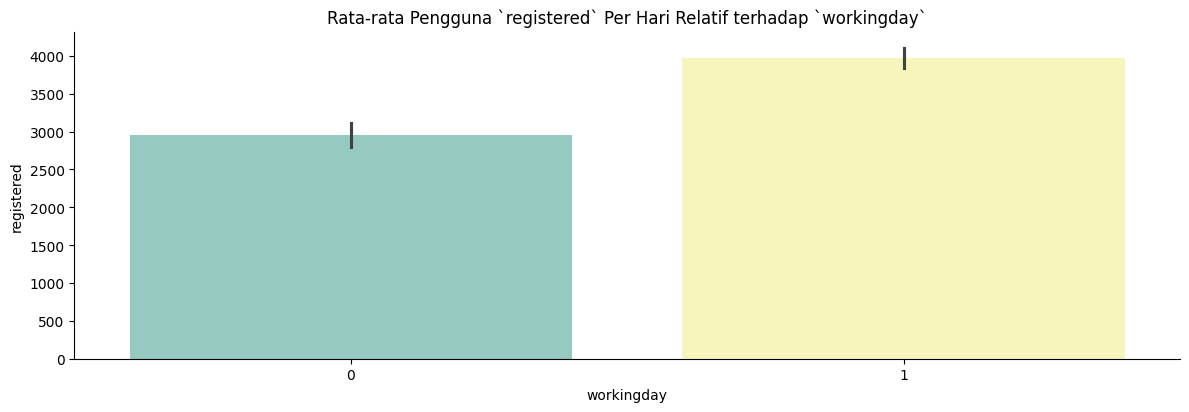

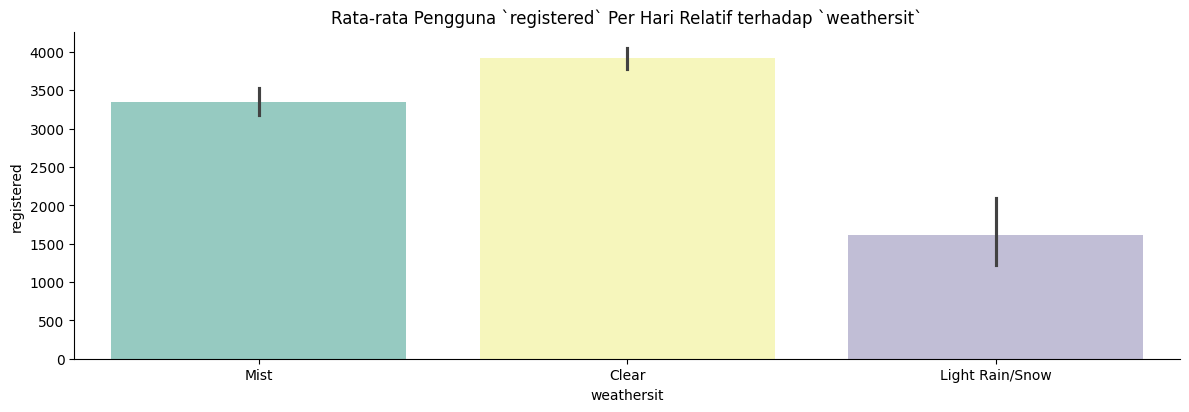

In [35]:
for col in day_categorical_features:
  sns.catplot(x=col, y="registered", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_day_imputed, palette="Set3", hue=col, legend=False)
  plt.title("Rata-rata Pengguna `registered` Per Hari Relatif terhadap `{}`".format(col))

Pada setiap fitur kategorikal, pengguna `registered` per hari cenderung lebih banyak di musim spring/summer/fall, tahun 2012, bulan mei-oktober, bukan hari libur, hari senin-jumat, hari kerja, dan pada cuaca cerah/berkabut. Dapat diasumsikan bahwa pengguna `registered` adalah para pengguna yang bekerja kantoran.

##### `Hour` Dataset

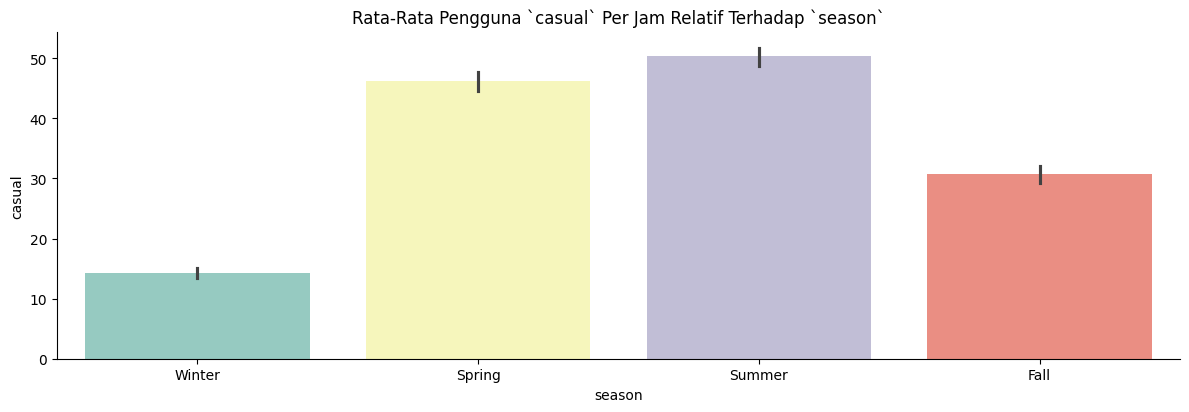

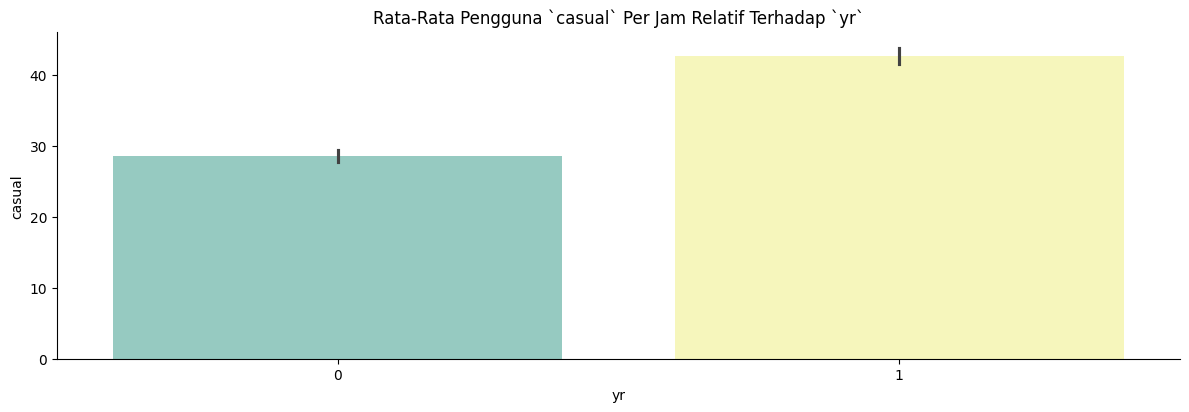

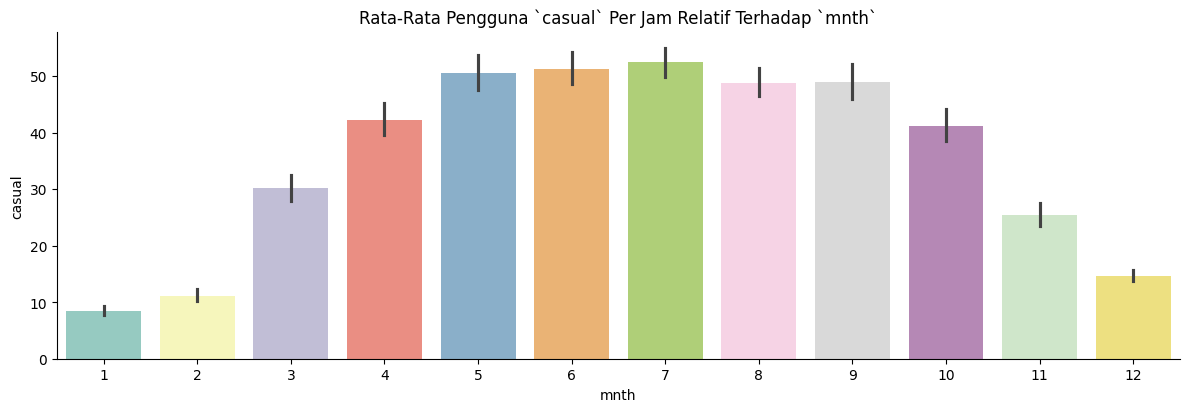

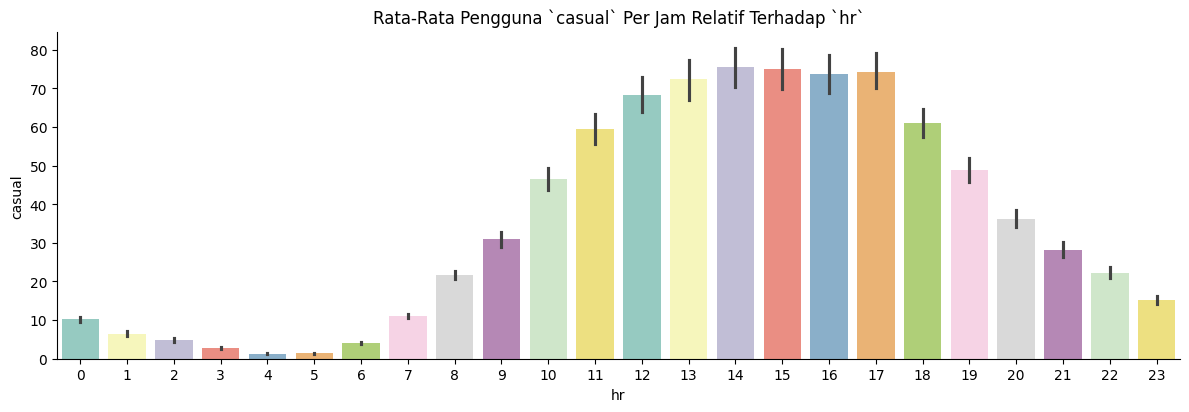

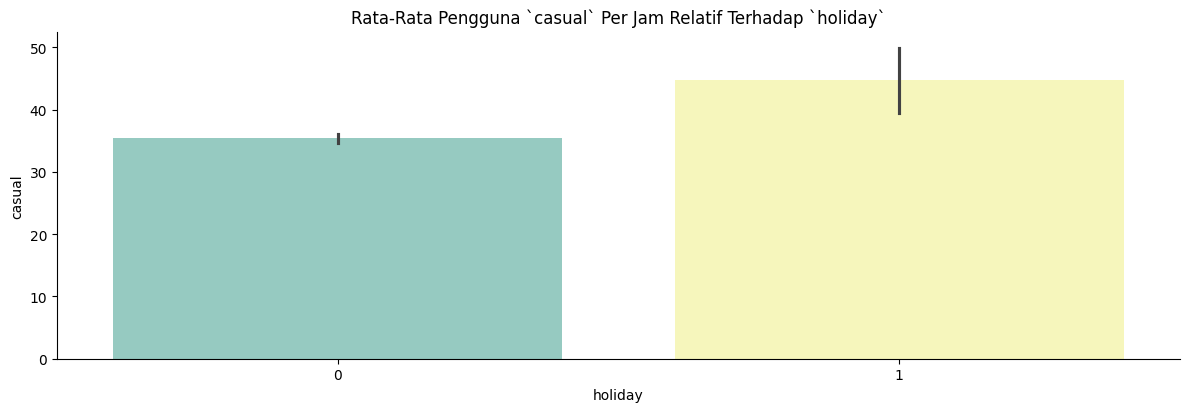

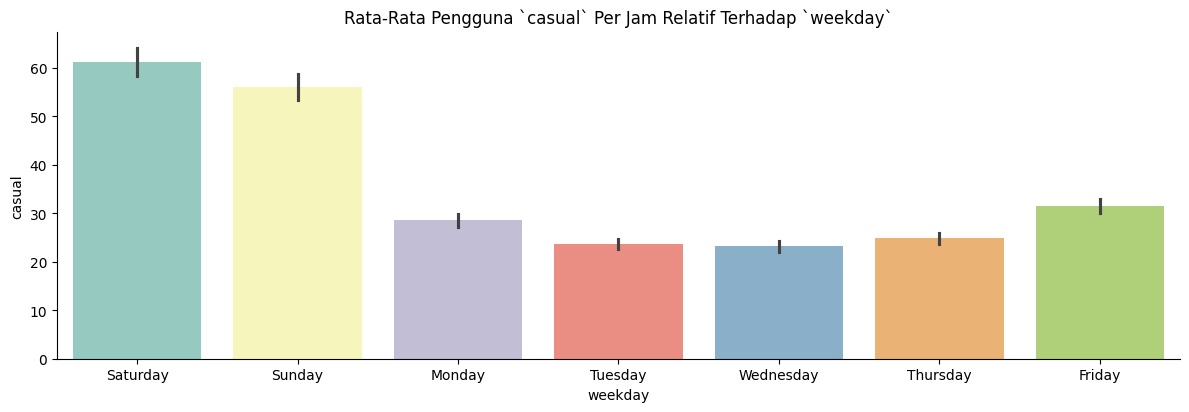

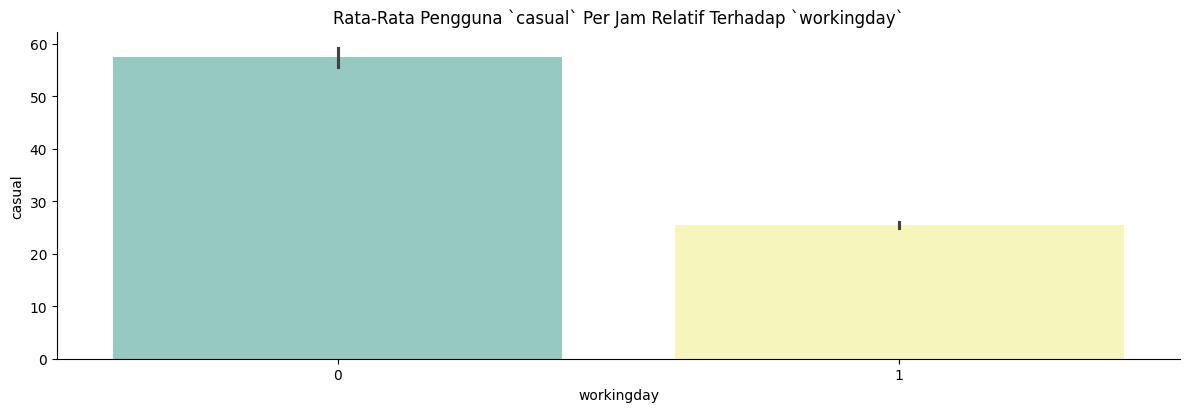

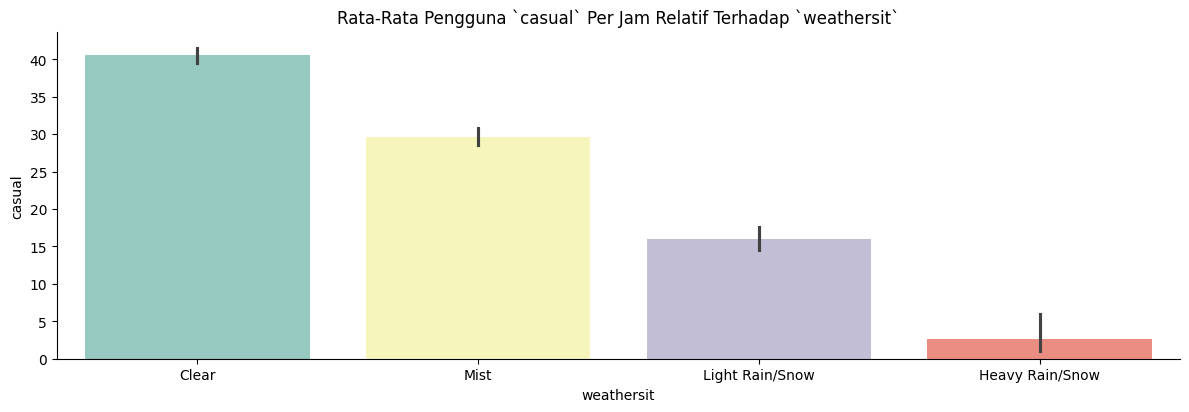

In [36]:
for col in hour_categorical_features:
  sns.catplot(x=col, y="casual", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_hour_imputed, palette="Set3", hue=col, legend=False)
  plt.title("Rata-Rata Pengguna `casual` Per Jam Relatif Terhadap `{}`".format(col))

Pada setiap fitur kategorikal, pengguna `casual` per jam kurang lebih sama seperti pengguna `casual` per hari, dengan tambahan cenderung lebih banyak di jam 12-17. Hal ini semakin menguatkan asumsi bahwa pengguna `casual` adalah para pengguna yang sedang berlibur.

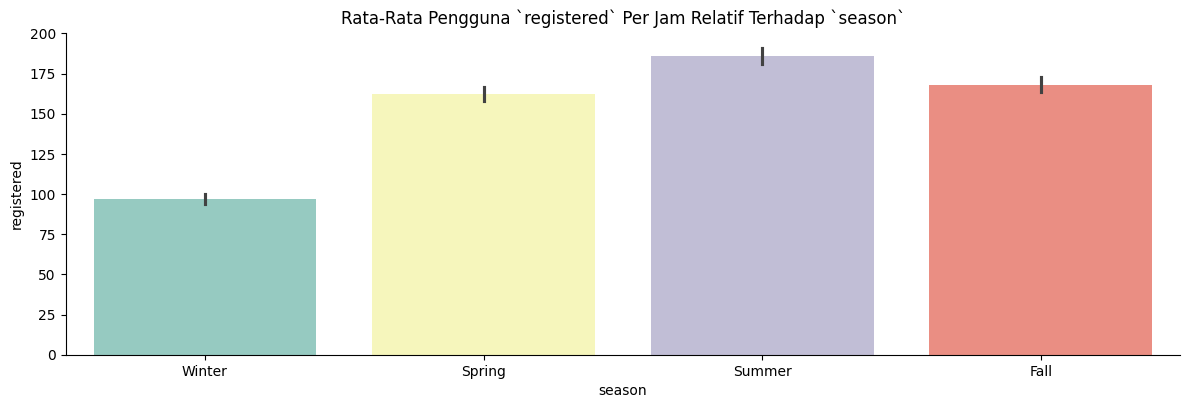

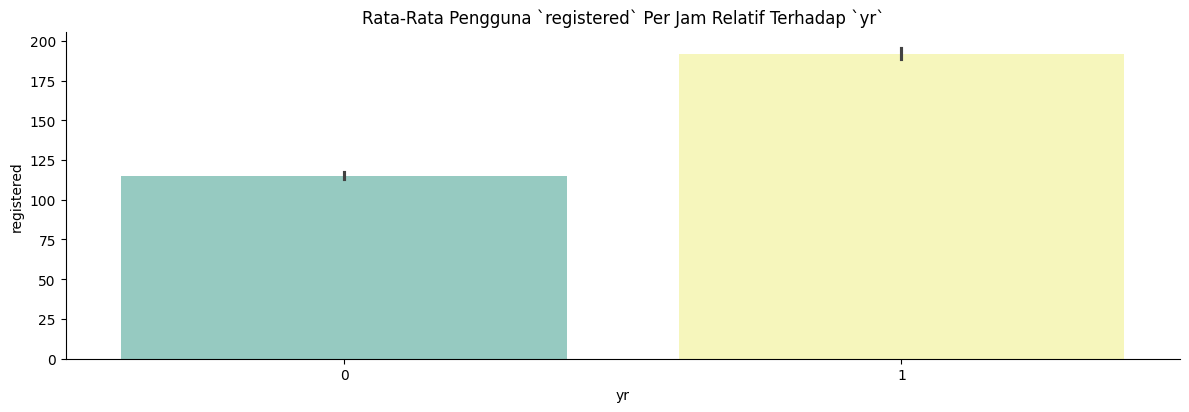

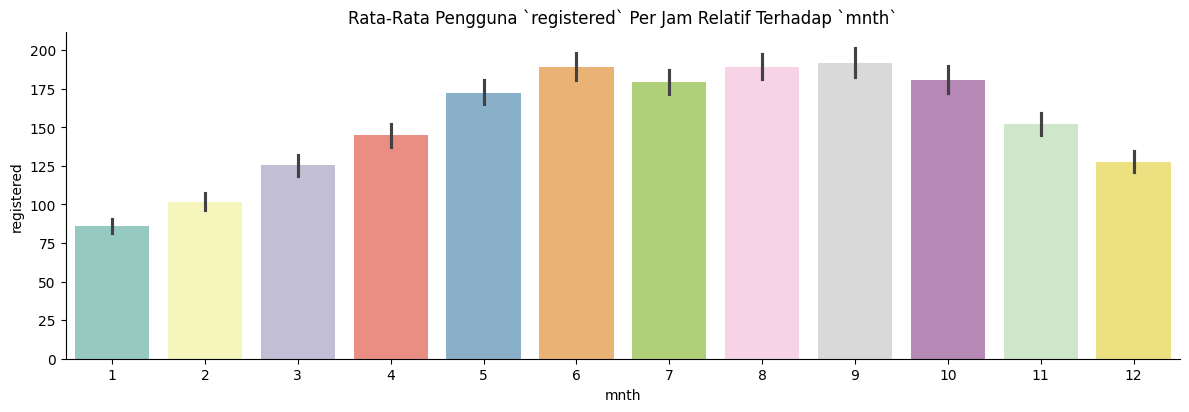

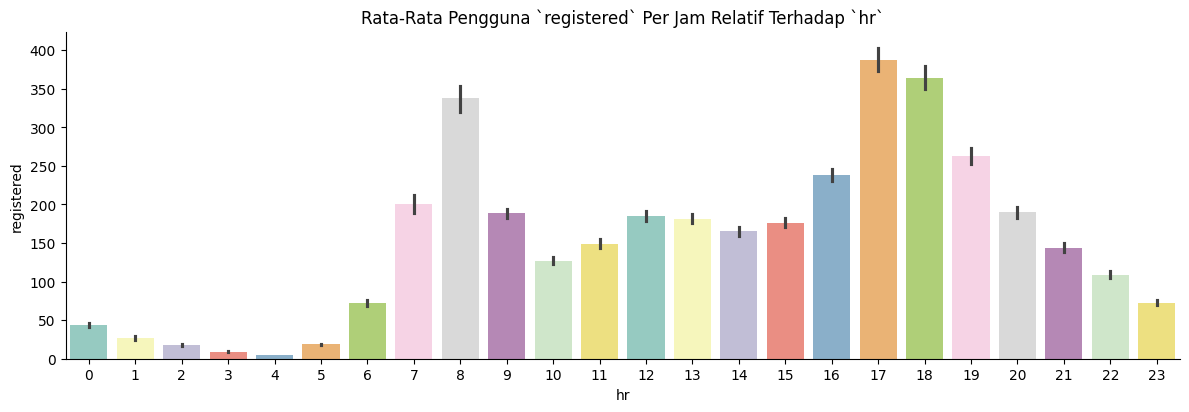

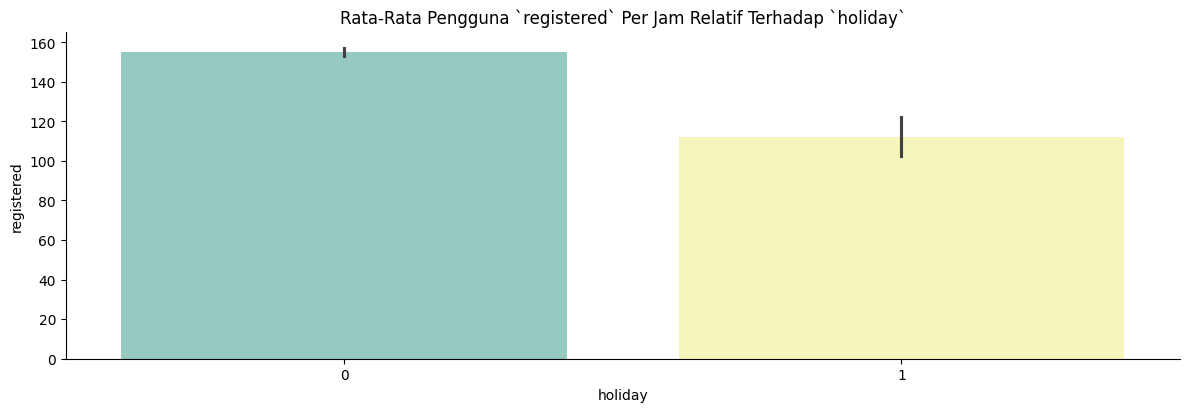

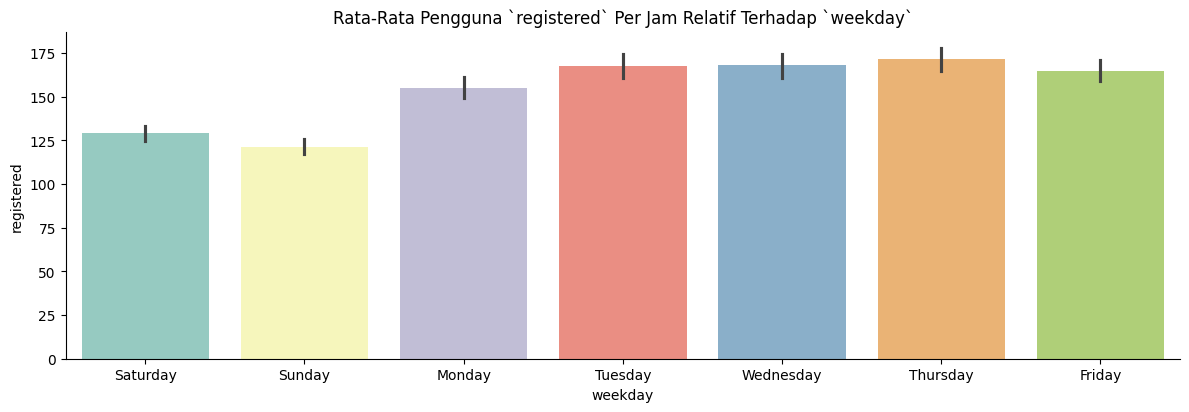

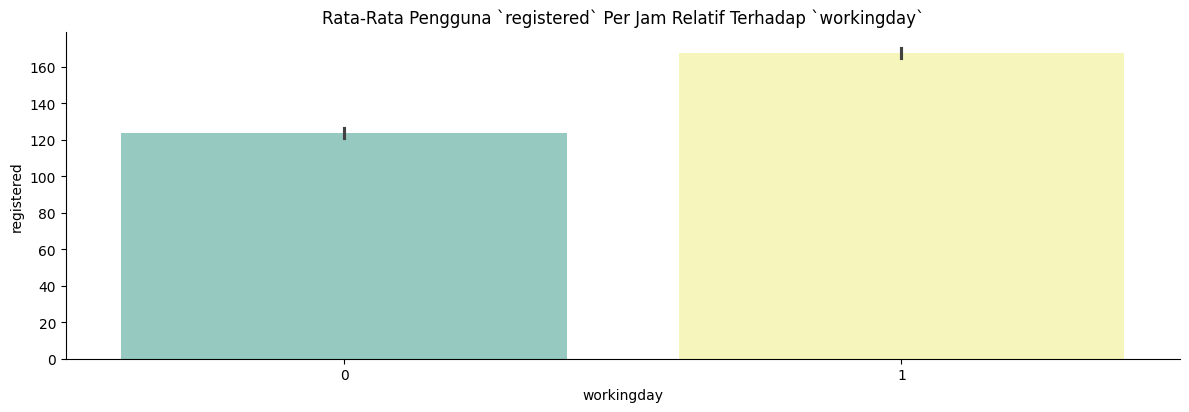

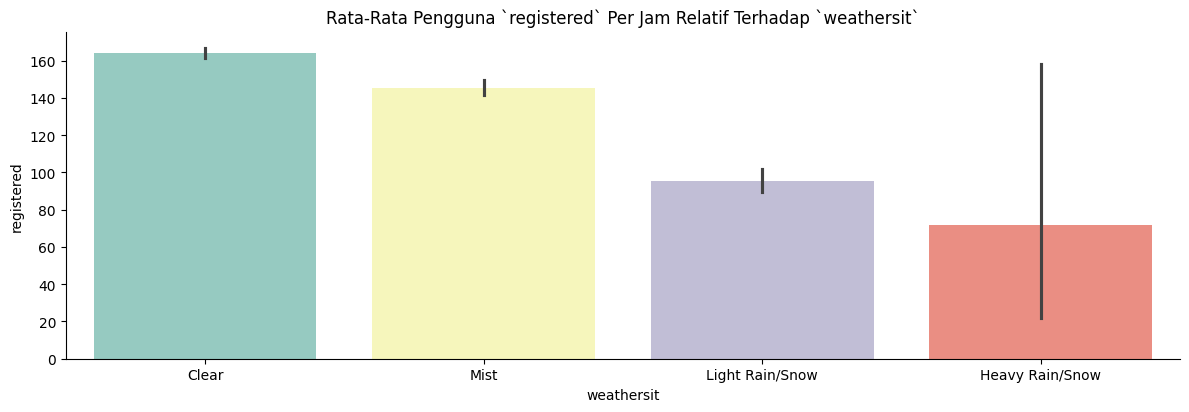

In [37]:
for col in hour_categorical_features:
  sns.catplot(x=col, y="registered", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_hour_imputed, palette="Set3", hue=col, legend=False)
  plt.title("Rata-Rata Pengguna `registered` Per Jam Relatif Terhadap `{}`".format(col))

Pada setiap fitur kategorikal, pengguna `registered` per jam kurang lebih sama seperti pengguna `registered` per hari, dengan tambahan cenderung lebih banyak di jam 8 dan 17-18. Hal ini semakin menguatkan asumsi bahwa pengguna `registered` adalah para pengguna yang bekerja kantoran.

#### Numerical Features

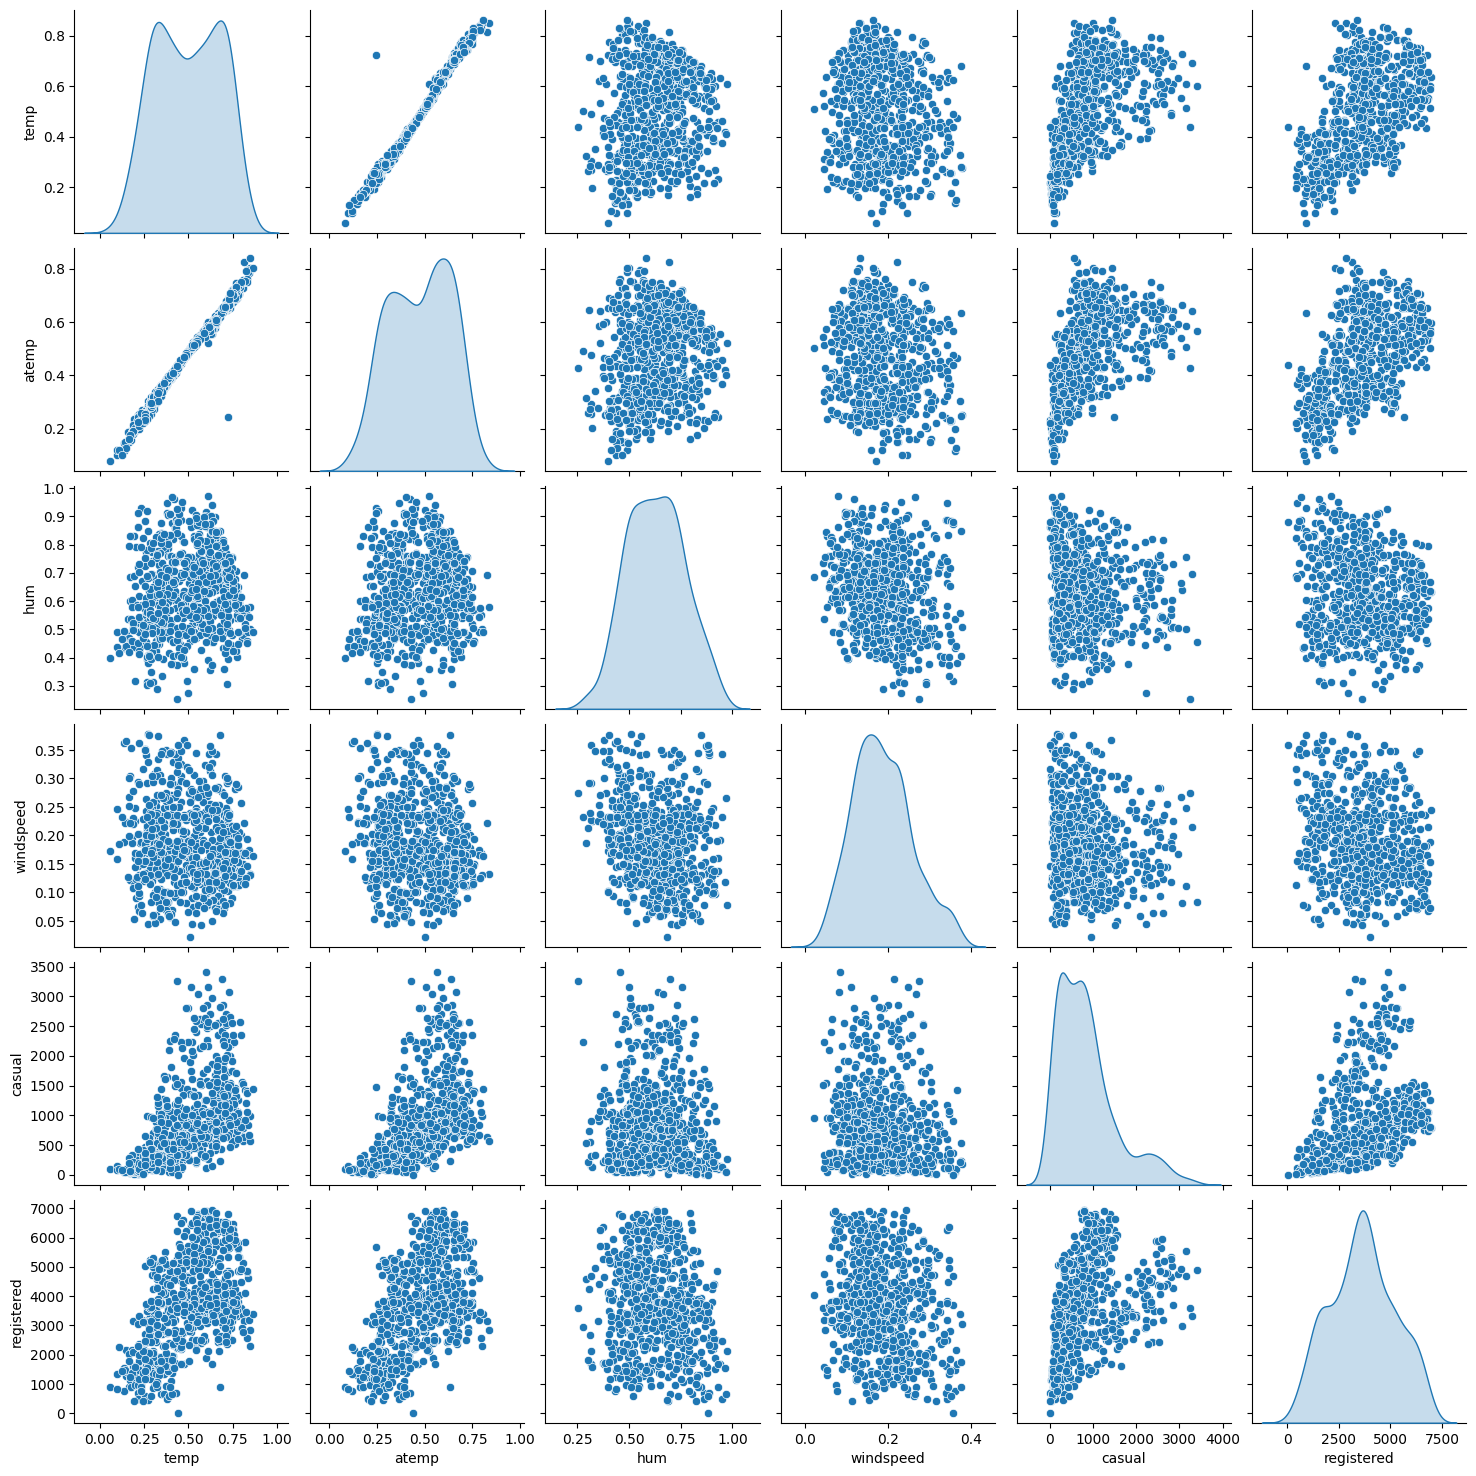

In [38]:
sns.pairplot(df_day_imputed[numerical_features + target_columns], diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik Dataset `day`')

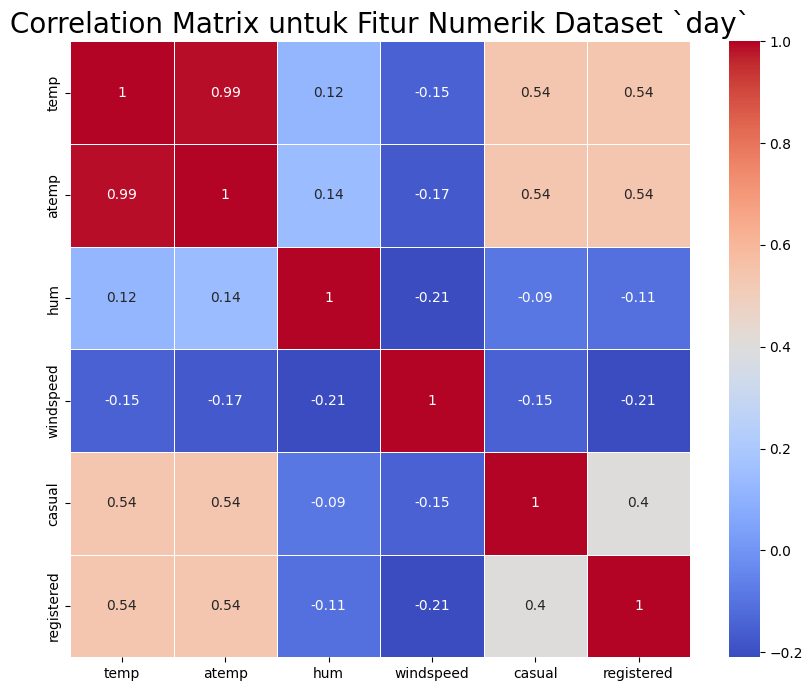

In [39]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_day_imputed[numerical_features + target_columns].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik Dataset `day`", size=20)

Pada pola sebaran pairplot dan correlation matrix untuk fitur numerik dataset `day` tidak terdapat fitur yang signifikan berkorelasi (mendekati -1 atau 1) terhadap kolom target (`casual` dan `registered`). Kolom `temp` dan `atemp` memiliki korelasi paling besar dengan nilai korelasi 0.54.

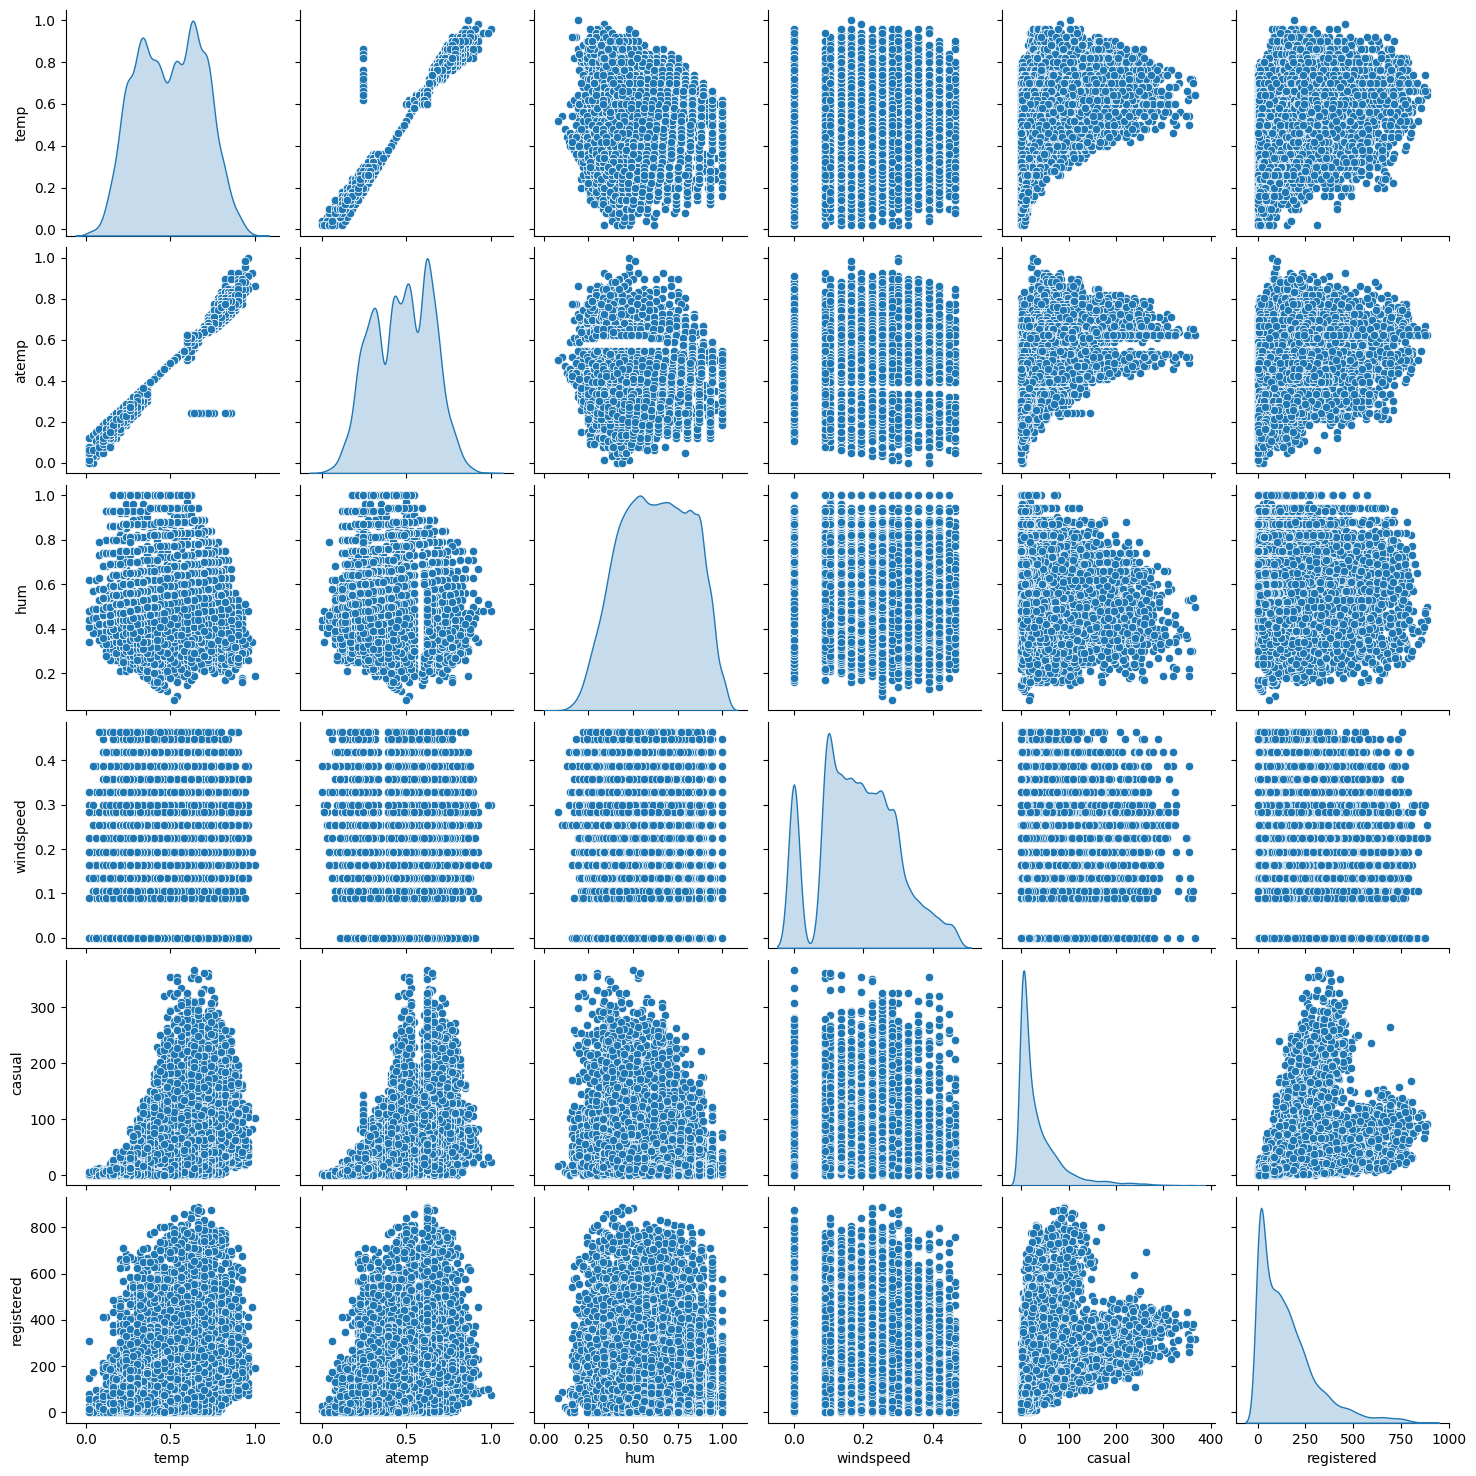

In [40]:
sns.pairplot(df_hour_imputed[numerical_features + target_columns], diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik Dataset `hour`')

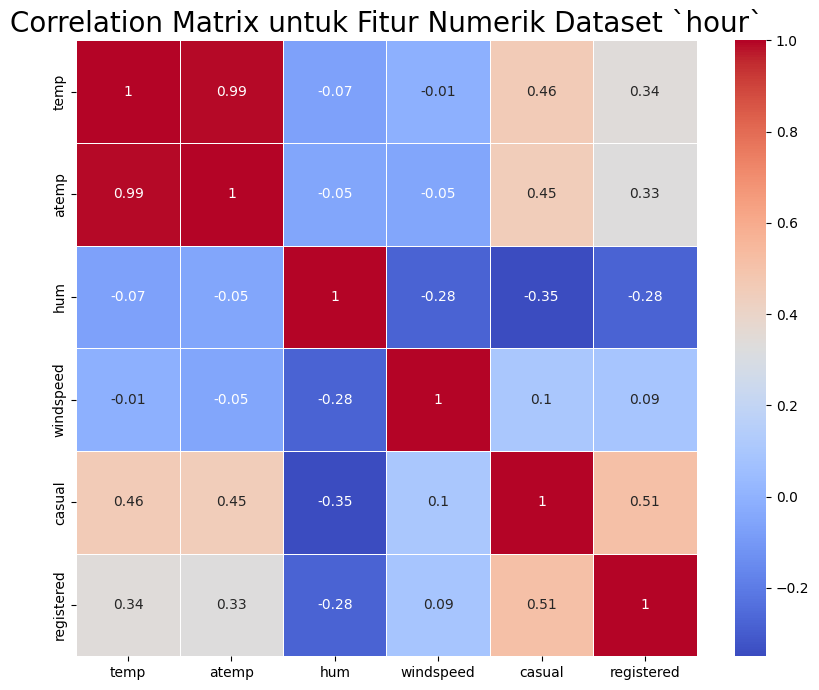

In [41]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_hour_imputed[numerical_features + target_columns].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik Dataset `hour`", size=20)

Pada pola sebaran pairplot dan correlation matrix untuk fitur numerik dataset `hour` tidak terdapat fitur yang signifikan berkorelasi (mendekati -1 atau 1) terhadap kolom target (`casual` dan `registered`). Kolom `temp` memiliki korelasi paling besar dengan nilai korelasi 0.46 dan 0.34.

## Data Preparation

### Encoding Fitur Kategori

In [42]:
day_encoding_cols = ['season', 'mnth', 'weekday', 'weathersit']
hour_encoding_cols = ['season', 'mnth', 'hr', 'weekday', 'weathersit']

encoded_df_day = df_day_imputed.copy()
encoded_df_hour = df_hour_imputed.copy()

for col in day_encoding_cols:
  encoded_df_day = pd.concat([encoded_df_day, pd.get_dummies(encoded_df_day[col], prefix=col, dtype=int)], axis=1)

encoded_df_day.drop(day_encoding_cols, axis=1, inplace=True)

for col in hour_encoding_cols:
  encoded_df_hour = pd.concat([encoded_df_hour, pd.get_dummies(encoded_df_hour[col], prefix=col, dtype=int)], axis=1)

encoded_df_hour.drop(hour_encoding_cols, axis=1, inplace=True)

In [43]:
encoded_df_day.sample()

yr  holiday  workingday    temp     atemp     hum  windspeed  \
dteday                                                                     
2012-05-26   1        0           0  0.6925  0.642696  0.7325   0.198992   

            casual  registered  season_Fall  ...  weekday_Friday  \
dteday                                       ...                   
2012-05-26    2855        3681            0  ...               0   

            weekday_Monday  weekday_Saturday  weekday_Sunday  \
dteday                                                         
2012-05-26               0                 1               0   

            weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
dteday                                                             
2012-05-26                 0                0                  0   

            weathersit_Clear  weathersit_Light Rain/Snow  weathersit_Mist  
dteday                                                                     
2012-05-26                 1                           0                0  

[1 rows x 35 columns]

In [44]:
encoded_df_hour.sample()

yr  holiday  workingday  temp   atemp   hum  windspeed  casual  \
dteday                                                                       
2011-12-01   0        0           1  0.36  0.3485  0.46     0.1343       9   

            registered  season_Fall  ...  weekday_Monday  weekday_Saturday  \
dteday                               ...                                     
2011-12-01         409            1  ...               0                 0   

            weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
dteday                                                          
2011-12-01               0                 1                0   

            weekday_Wednesday  weathersit_Clear  weathersit_Heavy Rain/Snow  \
dteday                                                                        
2011-12-01                  0                 1                           0   

            weathersit_Light Rain/Snow  weathersit_Mist  
dteday                                                   
2011-12-01                           0                0  

[1 rows x 60 columns]

### Reduksi Dimensi dengan PCA

Pada pola sebaran pairplot dan correlation matrix di section EDA, dapat dilihat bahwa kolom `temp` dan `atemp` berkorelasi tinggi.

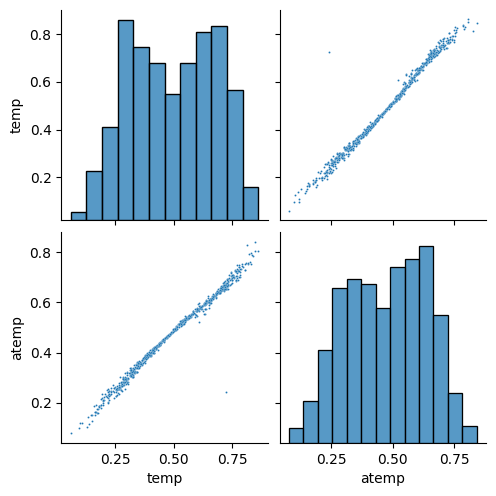

In [45]:
sns.pairplot(encoded_df_day[['temp','atemp']], plot_kws={"s": 2});

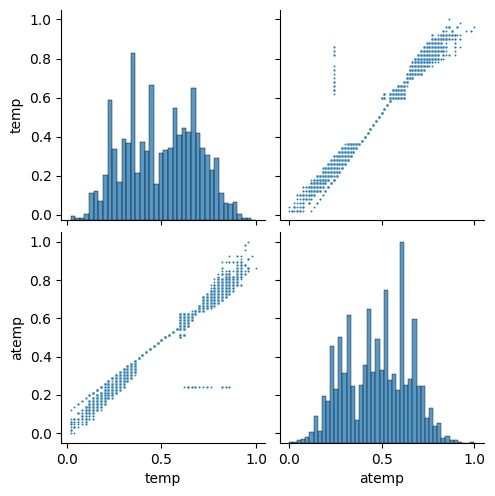

In [46]:
sns.pairplot(encoded_df_hour[['temp','atemp']], plot_kws={"s": 2});

Kolom `temp` dan `atemp` memiliki korelasi yang tinggi satu sama lain yang menunjukkan data yang berulang atau redundant sehingga dapat direduksi dimensinya.

#### `Day` Dataset

In [47]:
pca = PCA(n_components=2, random_state=123)
pca.fit(encoded_df_day[['temp','atemp']])
princ_comp = pca.transform(encoded_df_day[['temp','atemp']])

In [48]:
pca.explained_variance_ratio_.round(3)

array([0.996, 0.004])

In [49]:
df_day_ready = encoded_df_day.copy()

pca = PCA(n_components=1, random_state=123)
pca.fit(df_day_ready[['temp','atemp']])
df_day_ready['temperature'] = pca.transform(df_day_ready.loc[:, ('temp','atemp')]).flatten()
df_day_ready.drop(['temp','atemp'], axis=1, inplace=True)

df_day_ready.sample()

yr  holiday  workingday       hum  windspeed  casual  registered  \
dteday                                                                         
2012-01-05   1        0           1  0.524167   0.129987     140        3132   

            season_Fall  season_Spring  season_Summer  ...  weekday_Monday  \
dteday                                                 ...                   
2012-01-05            0              0              0  ...               0   

            weekday_Saturday  weekday_Sunday  weekday_Thursday  \
dteday                                                           
2012-01-05                 0               0                 1   

            weekday_Tuesday  weekday_Wednesday  weathersit_Clear  \
dteday                                                             
2012-01-05                0                  0                 1   

            weathersit_Light Rain/Snow  weathersit_Mist  temperature  
dteday                                                                
2012-01-05                           0                0     0.301744  

[1 rows x 34 columns]

#### `Hour` Dataset

In [50]:
pca = PCA(n_components=2, random_state=123)
pca.fit(encoded_df_hour[['temp','atemp']])
princ_comp = pca.transform(encoded_df_hour[['temp','atemp']])

In [51]:
pca.explained_variance_ratio_.round(3)

array([0.994, 0.006])

In [52]:
df_hour_ready = encoded_df_hour.copy()

pca = PCA(n_components=1, random_state=123)
pca.fit(df_hour_ready[['temp','atemp']])
df_hour_ready['temperature'] = pca.transform(df_hour_ready.loc[:, ('temp','atemp')]).flatten()
df_hour_ready.drop(['temp','atemp'], axis=1, inplace=True)

df_hour_ready.sample()

yr  holiday  workingday   hum  windspeed  casual  registered  \
dteday                                                                     
2012-05-21   1        0           1  0.73     0.2836      18          79   

            season_Fall  season_Spring  season_Summer  ...  weekday_Saturday  \
dteday                                                 ...                     
2012-05-21            0              1              0  ...                 0   

            weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
dteday                                                          
2012-05-21               0                 0                0   

            weekday_Wednesday  weathersit_Clear  weathersit_Heavy Rain/Snow  \
dteday                                                                        
2012-05-21                  0                 1                           0   

            weathersit_Light Rain/Snow  weathersit_Mist  temperature  
dteday                                                                
2012-05-21                           0                0     0.168431  

[1 rows x 59 columns]

### Train-Test-Split

train_test_split dataset `day` menggunakan proporsi pembagian data latih dan uji 80:20 karena memiliki jumlah sampel kurang dari 1.000 sampel. Kolom target `casual` dan `registered` dipisah untuk mempermudah analisis prediksi yang modular.

In [53]:
X_day = df_day_ready.drop(target_columns, axis=1)

y_day_cas = df_day_ready["casual"]
X_train_day_c, X_test_day_c, y_train_day_c, y_test_day_c = train_test_split(X_day, y_day_cas, test_size=0.2, random_state=123)

y_day_reg = df_day_ready["registered"]
X_train_day_r, X_test_day_r, y_train_day_r, y_test_day_r = train_test_split(X_day, y_day_reg, test_size=0.2, random_state=123)

In [54]:
print(f'Total # of sample in whole day dataset: {len(X_day)}')
print(f'Total # of sample in train `casual` day dataset: {len(X_train_day_c)}')
print(f'Total # of sample in test `casual` day dataset: {len(X_test_day_c)}')
print(f'Total # of sample in train `registered` day dataset: {len(X_train_day_r)}')
print(f'Total # of sample in test `registered` day dataset: {len(X_test_day_r)}')

Total # of sample in whole day dataset: 731
Total # of sample in train `casual` day dataset: 584
Total # of sample in test `casual` day dataset: 147
Total # of sample in train `registered` day dataset: 584
Total # of sample in test `registered` day dataset: 147


train_test_split dataset `hour` menggunakan proporsi pembagian data latih dan uji 90:10 karena memiliki jumlah sampel yang banyak (lebih dari 10.000 sampel). Kolom target `casual` dan `registered` dipisah untuk mempermudah analisis prediksi yang modular.

In [55]:
X_hour = df_hour_ready.drop(target_columns, axis=1)

y_hour_cas = df_hour_ready["casual"]
X_train_hour_c, X_test_hour_c, y_train_hour_c, y_test_hour_c = train_test_split(X_hour, y_hour_cas, test_size=0.1, random_state=123)

y_hour_reg = df_hour_ready["registered"]
X_train_hour_r, X_test_hour_r, y_train_hour_r, y_test_hour_r = train_test_split(X_hour, y_hour_reg, test_size=0.1, random_state=123)

In [56]:
print(f'Total # of sample in whole hour dataset: {len(X_hour)}')
print(f'Total # of sample in train `casual` hour dataset: {len(X_train_hour_c)}')
print(f'Total # of sample in test `casual` hour dataset: {len(X_test_hour_c)}')
print(f'Total # of sample in train `registered` hour dataset: {len(X_train_hour_r)}')
print(f'Total # of sample in test `registered` hour dataset: {len(X_test_hour_r)}')

Total # of sample in whole hour dataset: 17379
Total # of sample in train `casual` hour dataset: 15641
Total # of sample in test `casual` hour dataset: 1738
Total # of sample in train `registered` hour dataset: 15641
Total # of sample in test `registered` hour dataset: 1738


### Standarisasi Fitur Numerik

Standarisasi fitur numerik menggunakan StandardScaler untuk menggeser distribusi data mendekati distribusi normal. Algoritma machine learning memiliki performa yang lebih baik ketika data memiliki skala relatif sama.

In [57]:
numerical_features = ['temperature', 'hum', 'windspeed']

#### Dataset `day` - Target `casual`

In [58]:
scaler_day_cas = StandardScaler()
scaler_day_cas.fit(X_train_day_c[numerical_features])
X_train_day_c[numerical_features] = scaler_day_cas.transform(X_train_day_c.loc[:, numerical_features])
X_train_day_c[numerical_features].head()

temperature       hum  windspeed
dteday                                      
2012-10-04    -0.874443  0.690768  -0.976675
2012-12-06     1.302901 -0.855022  -0.179179
2012-07-20    -0.913619  1.565913   0.297760
2011-08-16    -1.109688 -0.352794   0.679194
2011-09-28    -0.716546  1.598991  -0.543369

In [59]:
X_train_day_c[numerical_features].describe().round(4)

temperature       hum  windspeed
count     584.0000  584.0000   584.0000
mean       -0.0000    0.0000    -0.0000
std         1.0009    1.0009     1.0009
min        -1.9490   -2.6925    -2.0256
25%        -0.8664   -0.7603    -0.7341
50%        -0.0225   -0.0295    -0.0795
75%         0.8795    0.7396     0.6358
max         2.3905    2.4922     2.6556

#### Dataset `day` - Target `registered`

In [60]:
scaler_day_reg = StandardScaler()
scaler_day_reg.fit(X_train_day_r[numerical_features])
X_train_day_r[numerical_features] = scaler_day_reg.transform(X_train_day_r.loc[:, numerical_features])
X_train_day_r[numerical_features].head()

temperature       hum  windspeed
dteday                                      
2012-10-04    -0.874443  0.690768  -0.976675
2012-12-06     1.302901 -0.855022  -0.179179
2012-07-20    -0.913619  1.565913   0.297760
2011-08-16    -1.109688 -0.352794   0.679194
2011-09-28    -0.716546  1.598991  -0.543369

In [61]:
X_train_day_r[numerical_features].describe().round(4)

temperature       hum  windspeed
count     584.0000  584.0000   584.0000
mean       -0.0000    0.0000    -0.0000
std         1.0009    1.0009     1.0009
min        -1.9490   -2.6925    -2.0256
25%        -0.8664   -0.7603    -0.7341
50%        -0.0225   -0.0295    -0.0795
75%         0.8795    0.7396     0.6358
max         2.3905    2.4922     2.6556

#### Dataset `hour` - Target `casual`

In [62]:
scaler_hour_cas = StandardScaler()
scaler_hour_cas.fit(X_train_hour_c[numerical_features])
X_train_hour_c[numerical_features] = scaler_hour_cas.transform(X_train_hour_c.loc[:, numerical_features])
X_train_hour_c[numerical_features].head()

temperature       hum  windspeed
dteday                                      
2012-07-24     0.807274  1.063064  -0.181135
2011-01-12    -1.697106 -0.819139   0.624045
2011-10-24     0.128288  0.278813  -0.718221
2012-05-18     0.846229 -1.498824  -0.450128
2011-08-03     1.079402  1.115347  -0.718221

In [63]:
X_train_hour_c[numerical_features].describe().round(4)

temperature         hum   windspeed
count   15641.0000  15641.0000  15641.0000
mean        0.0000     -0.0000     -0.0000
std         1.0000      1.0000      1.0000
min        -2.6090     -2.8582     -1.6583
25%        -0.8618     -0.7669     -0.7182
50%         0.0312      0.0174      0.0870
75%         0.7883      0.8016      0.6240
max         2.6919      1.9519      2.5043

#### Dataset `hour` - Target `registered`

In [64]:
scaler_hour_reg = StandardScaler()
scaler_hour_reg.fit(X_train_hour_r[numerical_features])
X_train_hour_r[numerical_features] = scaler_hour_reg.transform(X_train_hour_r.loc[:, numerical_features])
X_train_hour_r[numerical_features].head()

temperature       hum  windspeed
dteday                                      
2012-07-24     0.807274  1.063064  -0.181135
2011-01-12    -1.697106 -0.819139   0.624045
2011-10-24     0.128288  0.278813  -0.718221
2012-05-18     0.846229 -1.498824  -0.450128
2011-08-03     1.079402  1.115347  -0.718221

In [65]:
X_train_hour_r[numerical_features].describe().round(4)

temperature         hum   windspeed
count   15641.0000  15641.0000  15641.0000
mean        0.0000     -0.0000     -0.0000
std         1.0000      1.0000      1.0000
min        -2.6090     -2.8582     -1.6583
25%        -0.8618     -0.7669     -0.7182
50%         0.0312      0.0174      0.0870
75%         0.7883      0.8016      0.6240
max         2.6919      1.9519      2.5043

## Model Development

Model yang digunakan akan mengikuti yang diajarkan di kelas (K-Nearest Neighbor, Random Forest, Adaptive Boosting) dengan tambahan 1 algoritma gradient boosting, yaitu algoritma XGBoost (eXtreme Gradient Boosting).

In [66]:
# dataframe untuk analisis model dataset `day` target `casual`
models_day_cas = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'AdaBoost', 'XGBoost'])

In [67]:
# dataframe untuk analisis model dataset `day` target `registered`
models_day_reg = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'AdaBoost', 'XGBoost'])

In [68]:
# dataframe untuk analisis model dataset `hour` target `casual`
models_hour_cas = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'AdaBoost', 'XGBoost'])

In [69]:
# dataframe untuk analisis model dataset `hour` target `registered`
models_hour_reg = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'AdaBoost', 'XGBoost'])

### K-Nearest Neighbor

In [70]:
# model KNN untuk dataset `day` target `casual`
knn_day_cas = KNeighborsRegressor(n_neighbors=10)
knn_day_cas.fit(X_train_day_c, y_train_day_c)

models_day_cas.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn_day_cas.predict(X_train_day_c), y_true=y_train_day_c)

In [71]:
# model KNN untuk dataset `day` target `registered`
knn_day_reg = KNeighborsRegressor(n_neighbors=10)
knn_day_reg.fit(X_train_day_r, y_train_day_r)

models_day_reg.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn_day_reg.predict(X_train_day_r), y_true=y_train_day_r)

In [72]:
# model KNN untuk dataset `hour` target `casual`
knn_hour_cas = KNeighborsRegressor(n_neighbors=10)
knn_hour_cas.fit(X_train_hour_c, y_train_hour_c)

models_hour_cas.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn_hour_cas.predict(X_train_hour_c), y_true=y_train_hour_c)

In [73]:
# model KNN untuk dataset `hour` target `registered`
knn_hour_reg = KNeighborsRegressor(n_neighbors=10)
knn_hour_reg.fit(X_train_hour_r, y_train_hour_r)

models_hour_reg.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn_hour_reg.predict(X_train_hour_r), y_true=y_train_hour_r)

### Random Forest

In [74]:
# model RandomForest untuk dataset `day` target `casual`
RF_day_cas = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF_day_cas.fit(X_train_day_c, y_train_day_c)

models_day_cas.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF_day_cas.predict(X_train_day_c), y_true=y_train_day_c)

In [75]:
# model RandomForest untuk dataset `day` target `registered`
RF_day_reg = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF_day_reg.fit(X_train_day_r, y_train_day_r)

models_day_reg.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF_day_reg.predict(X_train_day_r), y_true=y_train_day_r)

In [76]:
# model RandomForest untuk dataset `hour` target `casual`
RF_hour_cas = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF_hour_cas.fit(X_train_hour_c, y_train_hour_c)

models_hour_cas.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF_hour_cas.predict(X_train_hour_c), y_true=y_train_hour_c)

In [77]:
# model RandomForest untuk dataset `hour` target `registered`
RF_hour_reg = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF_hour_reg.fit(X_train_hour_r, y_train_hour_r)

models_hour_reg.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF_hour_reg.predict(X_train_hour_r), y_true=y_train_hour_r)

### Adaptive Boosting

In [78]:
# model AdaBoost untuk dataset `day` target `casual`
adaboost_day_cas = AdaBoostRegressor(learning_rate=0.05, random_state=55)
adaboost_day_cas.fit(X_train_day_c, y_train_day_c)

models_day_cas.loc['train_mse','AdaBoost'] = mean_squared_error(y_pred=adaboost_day_cas.predict(X_train_day_c), y_true=y_train_day_c)

In [79]:
# model AdaBoost untuk dataset `day` target `registered`
adaboost_day_reg = AdaBoostRegressor(learning_rate=0.05, random_state=55)
adaboost_day_reg.fit(X_train_day_r, y_train_day_r)

models_day_reg.loc['train_mse','AdaBoost'] = mean_squared_error(y_pred=adaboost_day_reg.predict(X_train_day_r), y_true=y_train_day_r)

In [80]:
# model AdaBoost untuk dataset `hour` target `casual`
adaboost_hour_cas = AdaBoostRegressor(learning_rate=0.05, random_state=55)
adaboost_hour_cas.fit(X_train_hour_c, y_train_hour_c)

models_hour_cas.loc['train_mse','AdaBoost'] = mean_squared_error(y_pred=adaboost_hour_cas.predict(X_train_hour_c), y_true=y_train_hour_c)

In [81]:
# model AdaBoost untuk dataset `hour` target `registered`
adaboost_hour_reg = AdaBoostRegressor(learning_rate=0.05, random_state=55)
adaboost_hour_reg.fit(X_train_hour_r, y_train_hour_r)

models_hour_reg.loc['train_mse','AdaBoost'] = mean_squared_error(y_pred=adaboost_hour_reg.predict(X_train_hour_r), y_true=y_train_hour_r)

### Gradient Boosting

In [82]:
# model XGBoost untuk dataset `day` target `casual`
xgboost_day_cas = XGBRegressor(learning_rate=0.05, random_state=55)
xgboost_day_cas.fit(X_train_day_c, y_train_day_c)

models_day_cas.loc['train_mse','XGBoost'] = mean_squared_error(y_pred=xgboost_day_cas.predict(X_train_day_c), y_true=y_train_day_c)

In [83]:
# model XGBoost untuk dataset `day` target `registered`
xgboost_day_reg = XGBRegressor(learning_rate=0.05, random_state=55)
xgboost_day_reg.fit(X_train_day_r, y_train_day_r)

models_day_reg.loc['train_mse','XGBoost'] = mean_squared_error(y_pred=xgboost_day_reg.predict(X_train_day_r), y_true=y_train_day_r)

In [84]:
# model XGBoost untuk dataset `hour` target `casual`
xgboost_hour_cas = XGBRegressor(learning_rate=0.05, random_state=55)
xgboost_hour_cas.fit(X_train_hour_c, y_train_hour_c)

models_hour_cas.loc['train_mse','XGBoost'] = mean_squared_error(y_pred=xgboost_hour_cas.predict(X_train_hour_c), y_true=y_train_hour_c)

In [85]:
# model XGBoost untuk dataset `hour` target `registered`
xgboost_hour_reg = XGBRegressor(learning_rate=0.05, random_state=55)
xgboost_hour_reg.fit(X_train_hour_r, y_train_hour_r)

models_hour_reg.loc['train_mse','XGBoost'] = mean_squared_error(y_pred=xgboost_hour_reg.predict(X_train_hour_r), y_true=y_train_hour_r)

## Evaluasi Model

Evaluasi model regresi akan menggunakan metrik Mean Squared Error (MSE) untuk menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

In [86]:
# Lakukan scaling terhadap fitur numerik pada data uji sehingga memiliki skala data yang sama dengan data latih
X_test_day_c.loc[:, numerical_features] = scaler_day_cas.transform(X_test_day_c[numerical_features])
X_test_day_r.loc[:, numerical_features] = scaler_day_reg.transform(X_test_day_r[numerical_features])

X_test_hour_c.loc[:, numerical_features] = scaler_hour_cas.transform(X_test_hour_c[numerical_features])
X_test_hour_r.loc[:, numerical_features] = scaler_hour_reg.transform(X_test_hour_r[numerical_features])

### Evaluasi Prediksi Model Dataset `day`

#### Target `casual`

In [87]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse_day_cas = pd.DataFrame(columns=['train', 'test'], index=['KNN','RandomForest','AdaBoost','XGBoost'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict_day_c = {'KNN': knn_day_cas, 'RandomForest': RF_day_cas, 'AdaBoost': adaboost_day_cas, 'XGBoost': xgboost_day_cas}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict_day_c.items():
    mse_day_cas.loc[name, 'train'] = mean_squared_error(y_true=y_train_day_c, y_pred=model.predict(X_train_day_c))/1e3
    mse_day_cas.loc[name, 'test'] = mean_squared_error(y_true=y_test_day_c, y_pred=model.predict(X_test_day_c))/1e3

# Panggil mse
mse_day_cas

train        test
KNN           113.323376   79.738204
RandomForest   12.236806   84.088612
AdaBoost        98.04128  125.703101
XGBoost         6.283987   78.384786

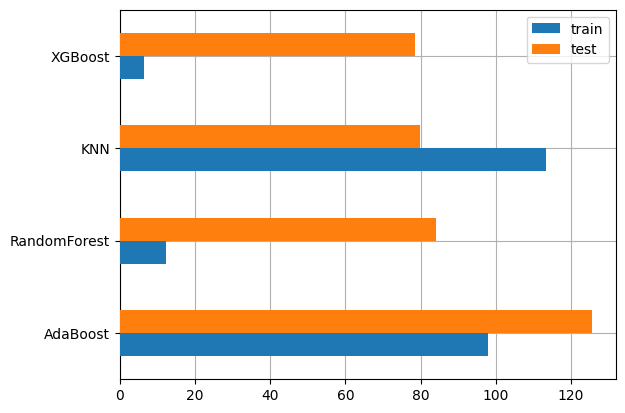

In [88]:
fig, ax = plt.subplots()
mse_day_cas.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dapat dilihat bahwa untuk dataset `day` dengan target `casual`, model XGBoost memberikan nilai error (MSE) yang paling kecil daripada algoritma lain pada data latih dan data uji, sehingga model XGBoost akan digunakan untuk melakukan prediksi jumlah pengguna `casual` pada dataset `day`.

In [89]:
prediksi_day_c = X_test_day_c.iloc[:5].copy()
pred_dict_day_c = {'y_true':y_test_day_c[:5]}
for name, model in model_dict_day_c.items():
    pred_dict_day_c['prediksi_'+name] = model.predict(prediksi_day_c).round(0)

pd.DataFrame(pred_dict_day_c)

y_true  prediksi_KNN  prediksi_RandomForest  prediksi_AdaBoost  \
dteday                                                                       
2012-05-03     764        1012.0                  725.0              996.0   
2012-02-26     515         612.0                  443.0              334.0   
2011-04-02     898         934.0                  686.0              651.0   
2011-10-28     456         358.0                  306.0              254.0   
2011-06-27     854        1049.0                  672.0              699.0   

            prediksi_XGBoost  
dteday                        
2012-05-03             742.0  
2012-02-26             442.0  
2011-04-02             670.0  
2011-10-28             276.0  
2011-06-27             680.0

#### Target `registered`

In [90]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse_day_reg = pd.DataFrame(columns=['train', 'test'], index=['KNN','RandomForest','AdaBoost','XGBoost'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict_day_r = {'KNN': knn_day_reg, 'RandomForest': RF_day_reg, 'AdaBoost': adaboost_day_reg, 'XGBoost': xgboost_day_reg}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict_day_r.items():
    mse_day_reg.loc[name, 'train'] = mean_squared_error(y_true=y_train_day_r, y_pred=model.predict(X_train_day_r))/1e3
    mse_day_reg.loc[name, 'test'] = mean_squared_error(y_true=y_test_day_r, y_pred=model.predict(X_test_day_r))/1e3

# Panggil mse
mse_day_reg

train        test
KNN           551.825814   713.40972
RandomForest   47.369535  377.075951
AdaBoost      530.839485  675.899531
XGBoost        30.385332  385.472429

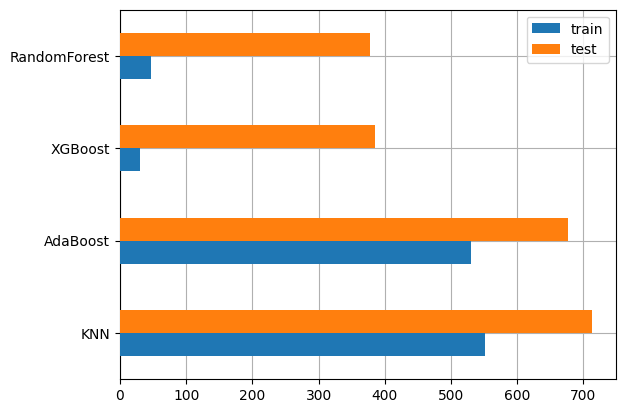

In [91]:
fig, ax = plt.subplots()
mse_day_reg.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dapat dilihat bahwa untuk dataset `day` dengan target `registered`, model XGBoost memberikan nilai error (MSE) yang paling kecil daripada algoritma lain pada data latih. Akan tetapi, model RandomForest memberikan nilai error (MSE) yang paling kecil daripada algoritma lain pada data uji, sehingga model RandomForest akan digunakan untuk melakukan prediksi jumlah pengguna `registered` pada dataset `day`.

In [92]:
prediksi_day_r = X_test_day_r.iloc[:5].copy()
pred_dict_day_r = {'y_true':y_test_day_r[:5]}
for name, model in model_dict_day_r.items():
    pred_dict_day_r['prediksi_'+name] = model.predict(prediksi_day_r).round(0)

pd.DataFrame(pred_dict_day_r)

y_true  prediksi_KNN  prediksi_RandomForest  prediksi_AdaBoost  \
dteday                                                                       
2012-05-03    5657        4681.0                 4904.0             5621.0   
2012-02-26    2874        2502.0                 2544.0             2860.0   
2011-04-02    1354        2403.0                 1535.0             2244.0   
2011-10-28    3291        2876.0                 3328.0             2850.0   
2011-06-27    3854        4260.0                 3946.0             3591.0   

            prediksi_XGBoost  
dteday                        
2012-05-03            5236.0  
2012-02-26            2416.0  
2011-04-02            1661.0  
2011-10-28            3225.0  
2011-06-27            3873.0

### Evaluasi Prediksi Model Dataset `hour`

#### Target `casual`

In [93]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse_hour_cas = pd.DataFrame(columns=['train', 'test'], index=['KNN','RandomForest','AdaBoost','XGBoost'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict_hour_c = {'KNN': knn_hour_cas, 'RandomForest': RF_hour_cas, 'AdaBoost': adaboost_hour_cas, 'XGBoost': xgboost_hour_cas}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict_hour_c.items():
    mse_hour_cas.loc[name, 'train'] = mean_squared_error(y_true=y_train_hour_c, y_pred=model.predict(X_train_hour_c))/1e3
    mse_hour_cas.loc[name, 'test'] = mean_squared_error(y_true=y_test_hour_c, y_pred=model.predict(X_test_hour_c))/1e3

# Panggil mse
mse_hour_cas

train      test
KNN           0.455017  0.582879
RandomForest  0.126084  0.438576
AdaBoost      1.192262  1.275039
XGBoost       0.338983  0.475651

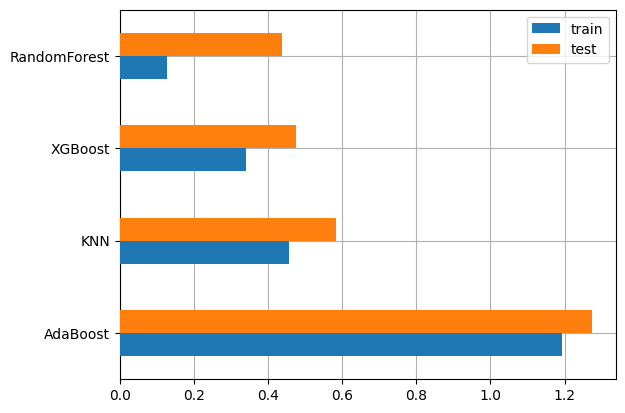

In [94]:
fig, ax = plt.subplots()
mse_hour_cas.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dapat dilihat bahwa untuk dataset `hour` dengan target `casual`, model RandomForest memberikan nilai error (MSE) yang paling kecil daripada algoritma lain pada data latih dan data uji, sehingga model RandomForest akan digunakan untuk melakukan prediksi jumlah pengguna `casual` pada dataset `hour`.

In [95]:
prediksi_hour_c = X_test_hour_c.iloc[:5].copy()
pred_dict_hour_c = {'y_true':y_test_hour_c[:5]}
for name, model in model_dict_hour_c.items():
    pred_dict_hour_c['prediksi_'+name] = model.predict(prediksi_hour_c).round(0)

pd.DataFrame(pred_dict_hour_c)

y_true  prediksi_KNN  prediksi_RandomForest  prediksi_AdaBoost  \
dteday                                                                       
2011-09-03     147          72.0                  101.0               73.0   
2011-11-27     113         103.0                  175.0              161.0   
2012-10-09       8           9.0                   22.0               23.0   
2012-09-23      71          86.0                   72.0               94.0   
2012-06-01      33          22.0                   20.0               23.0   

            prediksi_XGBoost  
dteday                        
2011-09-03              61.0  
2011-11-27             173.0  
2012-10-09              16.0  
2012-09-23              63.0  
2012-06-01              18.0

#### Target `registered`

In [96]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse_hour_reg = pd.DataFrame(columns=['train', 'test'], index=['KNN','RandomForest','AdaBoost','XGBoost'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict_hour_r = {'KNN': knn_hour_reg, 'RandomForest': RF_hour_reg, 'AdaBoost': adaboost_hour_reg, 'XGBoost': xgboost_hour_reg}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict_hour_r.items():
    mse_hour_reg.loc[name, 'train'] = mean_squared_error(y_true=y_train_hour_r, y_pred=model.predict(X_train_hour_r))/1e3
    mse_hour_reg.loc[name, 'test'] = mean_squared_error(y_true=y_test_hour_r, y_pred=model.predict(X_test_hour_r))/1e3

# Panggil mse
mse_hour_reg

train       test
KNN            7.455045   9.076764
RandomForest   1.383121   2.687725
AdaBoost      12.167595  12.034242
XGBoost        2.570123   2.959357

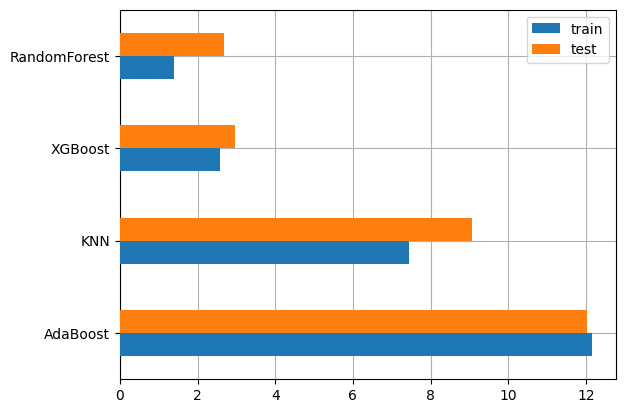

In [97]:
fig, ax = plt.subplots()
mse_hour_reg.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dapat dilihat bahwa untuk dataset `hour` dengan target `registered`, model RandomForest memberikan nilai error (MSE) yang paling kecil daripada algoritma lain pada data latih dan data uji, sehingga model RandomForest akan digunakan untuk melakukan prediksi jumlah pengguna `registered` pada dataset `hour`.

In [98]:
prediksi_day_r = X_test_day_r.iloc[:5].copy()
pred_dict_day_r = {'y_true':y_test_day_r[:5]}
for name, model in model_dict_day_r.items():
    pred_dict_day_r['prediksi_'+name] = model.predict(prediksi_day_r).round(0)

pd.DataFrame(pred_dict_day_r)

y_true  prediksi_KNN  prediksi_RandomForest  prediksi_AdaBoost  \
dteday                                                                       
2012-05-03    5657        4681.0                 4904.0             5621.0   
2012-02-26    2874        2502.0                 2544.0             2860.0   
2011-04-02    1354        2403.0                 1535.0             2244.0   
2011-10-28    3291        2876.0                 3328.0             2850.0   
2011-06-27    3854        4260.0                 3946.0             3591.0   

            prediksi_XGBoost  
dteday                        
2012-05-03            5236.0  
2012-02-26            2416.0  
2011-04-02            1661.0  
2011-10-28            3225.0  
2011-06-27            3873.0

## Kesimpulan

Dari keempat kasus, yaitu kombinasi dataset `day` dan `hour` dengan kolom target `casual` dan `registered`, model RandomForest memberikan hasil yang paling baik pada 3 dari 4 kasus uji.